In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt,seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, Birch, AffinityPropagation, MeanShift
from sklearn.metrics.pairwise import cosine_similarity
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth
import spotipy.util as util
import json, os
import config
import ast
from textblob import TextBlob

In [2]:
plt.rcParams.update({'font.size': 15.0})

In [3]:
os.environ['SPOTIPY_CLIENT_ID']= config.CLIENT_ID
os.environ['SPOTIPY_CLIENT_SECRET']= config.CLIENT_SECRET
os.environ['SPOTIPY_REDIRECT_URI']='http://localhost:8081/callback'

In [4]:
username = config.USERNAME
scope = 'user-top-read'
token = util.prompt_for_user_token(username,scope)
sp = spotipy.Spotify(auth=token)

In [7]:
tracks = []
for j in range(1960,2023):
    for i in range(0,1000,50):
        try:
            results = sp.search(q='year:'+str(j), type='track', limit=50,offset=i) 
            tracks.extend(results['tracks']['items'])
        except:
            token = util.prompt_for_user_token(username,scope)
            sp = spotipy.Spotify(auth=token)

In [8]:
df_tracks = pd.DataFrame(tracks)
df_tracks['release_date'] = df_tracks['album'].apply(lambda x: x['release_date'])
df_tracks.head()

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri,release_date
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,[IN],1,223506,False,{'isrc': 'INH109238940'},{'spotify': 'https://open.spotify.com/track/4n...,https://api.spotify.com/v1/tracks/4nEKA1qrppgD...,4nEKA1qrppgDexxV25EvKs,False,Chaudhvin Ka Chand Ho,39,https://p.scdn.co/mp3-preview/27570b0b2d10f42e...,1,track,spotify:track:4nEKA1qrppgDexxV25EvKs,1960-01-01
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,179693,False,{'isrc': 'USMC16046323'},{'spotify': 'https://open.spotify.com/track/4H...,https://api.spotify.com/v1/tracks/4Hhv2vrOTy89...,4Hhv2vrOTy89HFRcjU3QOx,False,At Last,75,https://p.scdn.co/mp3-preview/ad80364f22bde644...,7,track,spotify:track:4Hhv2vrOTy89HFRcjU3QOx,1960
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,[IN],1,315613,False,{'isrc': 'INH109832520'},{'spotify': 'https://open.spotify.com/track/6R...,https://api.spotify.com/v1/tracks/6Rl4eDKFpvnt...,6Rl4eDKFpvntiRKtPn8d5V,False,Ajib Dastan Hai Yeh,53,https://p.scdn.co/mp3-preview/90ee4e23e3641948...,7,track,spotify:track:6Rl4eDKFpvntiRKtPn8d5V,1960-01-01
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,[IN],1,280080,False,{'isrc': 'INH109350700'},{'spotify': 'https://open.spotify.com/track/4j...,https://api.spotify.com/v1/tracks/4jDfPSa6zoZ4...,4jDfPSa6zoZ4xGTSmyrg8i,False,Khoya Khoya Chand Khula Aasman,31,https://p.scdn.co/mp3-preview/e83541429168e45b...,8,track,spotify:track:4jDfPSa6zoZ4xGTSmyrg8i,1960-01-01
4,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,[IN],1,163360,False,{'isrc': 'INH100305220'},{'spotify': 'https://open.spotify.com/track/7p...,https://api.spotify.com/v1/tracks/7pCiEvG73gNj...,7pCiEvG73gNjyq6UdIUDYE,False,Dolayam,31,https://p.scdn.co/mp3-preview/9d7730f47a358f24...,5,track,spotify:track:7pCiEvG73gNjyq6UdIUDYE,1960-04-08


In [61]:
df_audio_features = pd.DataFrame(columns=list(sp.audio_features(df_tracks['id'].values[:1])[0].keys()))
for i in range(0,len(df_tracks),100):
    try:
        df_audio_features = pd.concat([df_audio_features,pd.DataFrame(sp.audio_features(df_tracks.loc[i:i+99,'id'].values))],ignore_index=True)
    except:
        pass

In [62]:
df_audio_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.274,0.348,5,-8.631,1,0.0293,0.547,0.013300,0.3340,0.328,87.430,audio_features,4Hhv2vrOTy89HFRcjU3QOx,spotify:track:4Hhv2vrOTy89HFRcjU3QOx,https://api.spotify.com/v1/tracks/4Hhv2vrOTy89...,https://api.spotify.com/v1/audio-analysis/4Hhv...,179693,3
1,0.524,0.280,7,-7.078,1,0.0289,0.899,0.000000,0.1440,0.525,97.691,audio_features,4nEKA1qrppgDexxV25EvKs,spotify:track:4nEKA1qrppgDexxV25EvKs,https://api.spotify.com/v1/tracks/4nEKA1qrppgD...,https://api.spotify.com/v1/audio-analysis/4nEK...,223507,4
2,0.397,0.560,0,-7.536,1,0.1260,0.898,0.000003,0.6030,0.697,171.294,audio_features,7pCiEvG73gNjyq6UdIUDYE,spotify:track:7pCiEvG73gNjyq6UdIUDYE,https://api.spotify.com/v1/tracks/7pCiEvG73gNj...,https://api.spotify.com/v1/audio-analysis/7pCi...,163360,4
3,0.454,0.388,1,-17.274,1,0.0455,0.919,0.001060,0.0806,0.672,112.476,audio_features,1xjO1qiSWdRoK4TXIR6PeJ,spotify:track:1xjO1qiSWdRoK4TXIR6PeJ,https://api.spotify.com/v1/tracks/1xjO1qiSWdRo...,https://api.spotify.com/v1/audio-analysis/1xjO...,423013,4
4,0.542,0.280,2,-14.974,1,0.0367,0.980,0.588000,0.1130,0.711,115.920,audio_features,5o4crBlWt8lQnLMfPmkzQS,spotify:track:5o4crBlWt8lQnLMfPmkzQS,https://api.spotify.com/v1/tracks/5o4crBlWt8lQ...,https://api.spotify.com/v1/audio-analysis/5o4c...,169933,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52795,0.696,0.401,2,-10.822,1,0.0469,0.311,0.005210,0.0463,0.944,96.475,audio_features,3V29kIVkcNchC5ydvY0ZyR,spotify:track:3V29kIVkcNchC5ydvY0ZyR,https://api.spotify.com/v1/tracks/3V29kIVkcNch...,https://api.spotify.com/v1/audio-analysis/3V29...,188944,4
52796,0.884,0.481,3,-9.328,0,0.0593,0.127,0.221000,0.0682,0.898,141.495,audio_features,5WxUaPf2AOxBcJ2nA7awdN,spotify:track:5WxUaPf2AOxBcJ2nA7awdN,https://api.spotify.com/v1/tracks/5WxUaPf2AOxB...,https://api.spotify.com/v1/audio-analysis/5WxU...,279261,4
52797,0.589,0.768,11,-7.164,0,0.0662,0.648,0.000000,0.0823,0.810,152.006,audio_features,1Ya1UL2b1s4GOHzzfyE5fv,spotify:track:1Ya1UL2b1s4GOHzzfyE5fv,https://api.spotify.com/v1/tracks/1Ya1UL2b1s4G...,https://api.spotify.com/v1/audio-analysis/1Ya1...,205640,4
52798,0.795,0.603,4,-7.446,1,0.0315,0.407,0.007310,0.0898,0.938,102.040,audio_features,6MYyzyA2ePAvrELcaA5qHG,spotify:track:6MYyzyA2ePAvrELcaA5qHG,https://api.spotify.com/v1/tracks/6MYyzyA2ePAv...,https://api.spotify.com/v1/audio-analysis/6MYy...,239827,4


In [67]:
df = df_tracks.merge(df_audio_features,on='id',how='left')
df

,album,artists,available_markets,disc_number,duration_ms_x,explicit,external_ids,external_urls,href,id,...,instrumentalness,liveness,valence,tempo,type_y,uri_y,track_href,analysis_url,duration_ms_y,time_signature
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,179693,False,{'isrc': 'USMC16046323'},{'spotify': 'https://open.spotify.com/track/4H...,https://api.spotify.com/v1/tracks/4Hhv2vrOTy89...,4Hhv2vrOTy89HFRcjU3QOx,...,0.013300,0.3340,0.328,87.430,audio_features,spotify:track:4Hhv2vrOTy89HFRcjU3QOx,https://api.spotify.com/v1/tracks/4Hhv2vrOTy89...,https://api.spotify.com/v1/audio-analysis/4Hhv...,179693,3
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,[IN],1,223506,False,{'isrc': 'INH109238940'},{'spotify': 'https://open.spotify.com/track/4n...,https://api.spotify.com/v1/tracks/4nEKA1qrppgD...,4nEKA1qrppgDexxV25EvKs,...,0.000000,0.1440,0.525,97.691,audio_features,spotify:track:4nEKA1qrppgDexxV25EvKs,https://api.spotify.com/v1/tracks/4nEKA1qrppgD...,https://api.spotify.com/v1/audio-analysis/4nEK...,223507,4
2,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,[IN],1,163360,False,{'isrc': 'INH100305220'},{'spotify': 'https://open.spotify.com/track/7p...,https://api.spotify.com/v1/tracks/7pCiEvG73gNj...,7pCiEvG73gNjyq6UdIUDYE,...,0.000003,0.6030,0.697,171.294,audio_features,spotify:track:7pCiEvG73gNjyq6UdIUDYE,https://api.spotify.com/v1/tracks/7pCiEvG73gNj...,https://api.spotify.com/v1/audio-analysis/7pCi...,163360,4
3,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,[IN],1,423013,False,{'isrc': 'INH100407396'},{'spotify': 'https://open.spotify.com/track/1x...,https://api.spotify.com/v1/tracks/1xjO1qiSWdRo...,1xjO1qiSWdRoK4TXIR6PeJ,...,0.001060,0.0806,0.672,112.476,audio_features,spotify:track:1xjO1qiSWdRoK4TXIR6PeJ,https://api.spotify.com/v1/tracks/1xjO1qiSWdRo...,https://api.spotify.com/v1/audio-analysis/1xjO...,423013,4
4,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,[IN],1,169933,False,{'isrc': 'INH100367800'},{'spotify': 'https://open.spotify.com/track/5o...,https://api.spotify.com/v1/tracks/5o4crBlWt8lQ...,5o4crBlWt8lQnLMfPmkzQS,...,0.588000,0.1130,0.711,115.920,audio_features,spotify:track:5o4crBlWt8lQnLMfPmkzQS,https://api.spotify.com/v1/tracks/5o4crBlWt8lQ...,https://api.spotify.com/v1/audio-analysis/5o4c...,169933,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52995,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,188943,False,{'isrc': 'USJ3V1204541'},{'spotify': 'https://open.spotify.com/track/3V...,https://api.spotify.com/v1/tracks/3V29kIVkcNch...,3V29kIVkcNchC5ydvY0ZyR,...,0.005210,0.0463,0.944,96.475,audio_features,spotify:track:3V29kIVkcNchC5ydvY0ZyR,https://api.spotify.com/v1/tracks/3V29kIVkcNch...,https://api.spotify.com/v1/audio-analysis/3V29...,188944,4
52996,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,279261,False,{'isrc': 'MYAG11100357'},{'spotify': 'https://open.spotify.com/track/5W...,https://api.spotify.com/v1/tracks/5WxUaPf2AOxB...,5WxUaPf2AOxBcJ2nA7awdN,...,0.221000,0.0682,0.898,141.495,audio_features,spotify:track:5WxUaPf2AOxBcJ2nA7awdN,https://api.spotify.com/v1/tracks/5WxUaPf2AOxB...,https://api.spotify.com/v1/audio-analysis/5WxU...,279261,4
52997,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,205640,False,{'isrc': 'TCABH1216565'},{'spotify': 'https://open.spotify.com/track/1Y...,https://api.spotify.com/v1/tracks/

In [123]:
for i,val in df[df.danceability.isnull()].iterrows():
    try:
        obj = sp.audio_features(df.loc[i,'id'])[0]
        del obj['id']
        df.loc[i,df.columns[len(df_tracks.columns):]] = list(obj.values())
    except:
        pass
df[df.danceability.isnull()]

,album,artists,available_markets,disc_number,duration_ms_x,explicit,external_ids,external_urls,href,id,...,instrumentalness,liveness,valence,tempo,type_y,uri_y,track_href,analysis_url,duration_ms_y,time_signature
9492,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,131998,False,{'isrc': 'GX5MX2169095'},{'spotify': 'https://open.spotify.com/track/2P...,https://api.spotify.com/v1/tracks/2PJGgRTVLRGG...,2PJGgRTVLRGG2LgrrdtDie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df['year'] = df['release_date'].apply(lambda x: int(x.split('-')[0]))
df

,album,artists,available_markets,disc_number,duration_ms_x,explicit,external_ids,external_urls,href,id,...,type_y,uri_y,track_href,analysis_url,duration_ms_y,time_signature,type,uri,duration_ms,year
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",1,179693,False,{'isrc': 'USMC16046323'},{'spotify': 'https://open.spotify.com/track/4H...,https://api.spotify.com/v1/tracks/4Hhv2vrOTy89...,4Hhv2vrOTy89HFRcjU3QOx,...,audio_features,spotify:track:4Hhv2vrOTy89HFRcjU3QOx,https://api.spotify.com/v1/tracks/4Hhv2vrOTy89...,https://api.spotify.com/v1/audio-analysis/4Hhv...,179693.0,3.0,NaN,NaN,NaN,1960
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,['IN'],1,223506,False,{'isrc': 'INH109238940'},{'spotify': 'https://open.spotify.com/track/4n...,https://api.spotify.com/v1/tracks/4nEKA1qrppgD...,4nEKA1qrppgDexxV25EvKs,...,audio_features,spotify:track:4nEKA1qrppgDexxV25EvKs,https://api.spotify.com/v1/tracks/4nEKA1qrppgD...,https://api.spotify.com/v1/audio-analysis/4nEK...,223507.0,4.0,NaN,NaN,NaN,1960
2,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,['IN'],1,163360,False,{'isrc': 'INH100305220'},{'spotify': 'https://open.spotify.com/track/7p...,https://api.spotify.com/v1/tracks/7pCiEvG73gNj...,7pCiEvG73gNjyq6UdIUDYE,...,audio_features,spotify:track:7pCiEvG73gNjyq6UdIUDYE,https://api.spotify.com/v1/tracks/7pCiEvG73gNj...,https://api.spotify.com/v1/audio-analysis/7pCi...,163360.0,4.0,NaN,NaN,NaN,1960
3,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,['IN'],1,423013,False,{'isrc': 'INH100407396'},{'spotify': 'https://open.spotify.com/track/1x...,https://api.spotify.com/v1/tracks/1xjO1qiSWdRo...,1xjO1qiSWdRoK4TXIR6PeJ,...,audio_features,spotify:track:1xjO1qiSWdRoK4TXIR6PeJ,https://api.spotify.com/v1/tracks/1xjO1qiSWdRo...,https://api.spotify.com/v1/audio-analysis/1xjO...,423013.0,4.0,NaN,NaN,NaN,1960
4,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,['IN'],1,169933,False,{'isrc': 'INH100367800'},{'spotify': 'https://open.spotify.com/track/5o...,https://api.spotify.com/v1/tracks/5o4crBlWt8lQ...,5o4crBlWt8lQnLMfPmkzQS,...,audio_features,spotify:track:5o4crBlWt8lQnLMfPmkzQS,https://api.spotify.com/v1/tracks/5o4crBlWt8lQ...,https://api.spotify.com/v1/audio-analysis/5o4c...,169933.0,3.0,NaN,NaN,NaN,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",1,193374,False,{'isrc': 'FR2X42203488'},{'spotify': 'https://open.spotify.com/track/04...,https://api.spotify.com/v1/tracks/046srpP68Vu1...,046srpP68Vu1evgrTPEQOU,...,NaN,NaN,https://api.spotify.com/v1/tracks/046srpP68Vu1...,https://api.spotify.com/v1/audio-analysis/046s...,NaN,4.0,audio_features,spotify:track:046srpP68Vu1evgrTPEQOU,193375.0,2022
9995,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AE', 'AL', 'AR', 'AT', 'AU', 'BA', 'BE', 'BG...",1,185857,True,{'isrc': 'USUM72208020'},{'spotify': 'https://open.spotify.com/track/3Z...,https://api.spotify.com/v1/tracks/3Z7HBhF9LfOg...,3Z7HBhF9LfOgMWNwk5tCsS,...,NaN,NaN,https://api.spotify.com/v1/tracks/3Z7HBhF9LfOg...,https://api.spotify.com/v1/audio-analysis/3Z7H...,NaN,4.0,audio_features,spotify:track:3Z7HBhF9LfOgMWNwk5tCsS,185857.0,2022
9996,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,"['AE', 'AL', 'AR', 'AT', 'AU', 'BA', 'BE', 'BG...",1,193506,True,{'isrc': 'USUM72120404'},{'spotify': 'https://open.spotify.com/track/08...,https://api.spotify.com/v1/tracks/0898kA1lLwX1...,0898kA1lLwX1YFKPSDwDUa,...,NaN,NaN,https://api.spotify.

In [33]:
df.isnull().sum()

album                    0
artists                  0
available_markets        0
disc_number              0
duration_ms_x            0
explicit                 0
external_ids             0
external_urls            0
href                     0
id                       0
is_local                 0
name                    11
popularity               0
preview_url              2
track_number             0
type_x                   0
uri_x                    0
release_date             0
danceability             3
energy                   3
key                      3
loudness                 3
mode                     3
speechiness              3
acousticness             3
instrumentalness         3
liveness                 3
valence                  3
tempo                    3
type_y               10000
uri_y                10000
track_href               3
analysis_url             3
duration_ms_y        10000
time_signature           3
type                 53002
uri                  53002
d

In [34]:
df.drop(columns=['type','uri','duration_ms','type_y','uri_y','duration_ms_y'],inplace=True)
df.rename(columns={'type_x':'type','uri_x':'uri','duration_ms_x':'duration_ms'},inplace=True)
df

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,analysis_url,time_signature,year
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",1,179693,False,{'isrc': 'USMC16046323'},{'spotify': 'https://open.spotify.com/track/4H...,https://api.spotify.com/v1/tracks/4Hhv2vrOTy89...,4Hhv2vrOTy89HFRcjU3QOx,...,0.0293,0.5470,0.013300,0.3340,0.328,87.430,https://api.spotify.com/v1/tracks/4Hhv2vrOTy89...,https://api.spotify.com/v1/audio-analysis/4Hhv...,3.0,1960
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,['IN'],1,223506,False,{'isrc': 'INH109238940'},{'spotify': 'https://open.spotify.com/track/4n...,https://api.spotify.com/v1/tracks/4nEKA1qrppgD...,4nEKA1qrppgDexxV25EvKs,...,0.0289,0.8990,0.000000,0.1440,0.525,97.691,https://api.spotify.com/v1/tracks/4nEKA1qrppgD...,https://api.spotify.com/v1/audio-analysis/4nEK...,4.0,1960
2,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,['IN'],1,163360,False,{'isrc': 'INH100305220'},{'spotify': 'https://open.spotify.com/track/7p...,https://api.spotify.com/v1/tracks/7pCiEvG73gNj...,7pCiEvG73gNjyq6UdIUDYE,...,0.1260,0.8980,0.000003,0.6030,0.697,171.294,https://api.spotify.com/v1/tracks/7pCiEvG73gNj...,https://api.spotify.com/v1/audio-analysis/7pCi...,4.0,1960
3,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,['IN'],1,423013,False,{'isrc': 'INH100407396'},{'spotify': 'https://open.spotify.com/track/1x...,https://api.spotify.com/v1/tracks/1xjO1qiSWdRo...,1xjO1qiSWdRoK4TXIR6PeJ,...,0.0455,0.9190,0.001060,0.0806,0.672,112.476,https://api.spotify.com/v1/tracks/1xjO1qiSWdRo...,https://api.spotify.com/v1/audio-analysis/1xjO...,4.0,1960
4,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,['IN'],1,169933,False,{'isrc': 'INH100367800'},{'spotify': 'https://open.spotify.com/track/5o...,https://api.spotify.com/v1/tracks/5o4crBlWt8lQ...,5o4crBlWt8lQnLMfPmkzQS,...,0.0367,0.9800,0.588000,0.1130,0.711,115.920,https://api.spotify.com/v1/tracks/5o4crBlWt8lQ...,https://api.spotify.com/v1/audio-analysis/5o4c...,3.0,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",1,193374,False,{'isrc': 'FR2X42203488'},{'spotify': 'https://open.spotify.com/track/04...,https://api.spotify.com/v1/tracks/046srpP68Vu1...,046srpP68Vu1evgrTPEQOU,...,0.0303,0.4120,0.000000,0.1090,0.453,149.884,https://api.spotify.com/v1/tracks/046srpP68Vu1...,https://api.spotify.com/v1/audio-analysis/046s...,4.0,2022
9995,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AE', 'AL', 'AR', 'AT', 'AU', 'BA', 'BE', 'BG...",1,185857,True,{'isrc': 'USUM72208020'},{'spotify': 'https://open.spotify.com/track/3Z...,https://api.spotify.com/v1/tracks/3Z7HBhF9LfOg...,3Z7HBhF9LfOgMWNwk5tCsS,...,0.1530,0.0380,0.000000,0.1130,0.377,93.923,https://api.spotify.com/v1/tracks/3Z7HBhF9LfOg...,https://api.spotify.com/v1/audio-analysis/3Z7H...,4.0,2022
9996,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,"['AE', 'AL', 'AR', 'AT', 'AU', 'BA', 'BE', 'BG...",1,193506,True,{'isrc': 'USUM72120404'},{'spotify': 'https://open.spotify.com/track/08...,https://api.spotify.com/v1/tracks/0898kA1lLwX1...,0898kA1lLwX1YFKPSDwDUa,...,0.0530,0.0361,0.000000,0.0755,0.688,97.014,https://api.spotify.com/v1/tracks/0898kA1lLwX1...,https://api.spotify.com/v1/audio-analysis/0898...,4.0,2022
9997,"{'album_type': 'single', 'artists': [{'externa...",[{'externa

In [11]:
df.dropna(inplace=True)

In [96]:
df['album_name'] = df['album'].apply(lambda x: x['name'])
df['artists_name'] = df['artists'].apply(lambda x: x[0]['name'] if len(x)==1 else [i['name'] for i in x])
df['no_of_artists'] = df['artists'].apply(lambda x: len(x))
df['no_of_markets'] = df['available_markets'].apply(lambda x: len(x))
df['album_type'] = df['album'].apply(lambda x: x['album_type'])
df['album_total_tracks'] = df['album'].apply(lambda x: x['total_tracks'])

In [16]:
df.to_csv('Spotify_1960_to_2022.csv')

In [5]:
df = pd.read_csv('Spotify_1960_to_2022.csv',index_col=0)

# obj_cols = ['album','artists','available_markets','external_ids','external_urls']
# for i in obj_cols:
#     df[i] = df[i].apply(lambda x: ast.literal_eval(x))

In [6]:
df.head()

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,...,analysis_url,time_signature,year,album_name,artists_name,no_of_artists,no_of_markets,years_window,album_type,album_total_tracks
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",1,179693,False,{'isrc': 'USMC16046323'},{'spotify': 'https://open.spotify.com/track/4H...,https://api.spotify.com/v1/tracks/4Hhv2vrOTy89...,4Hhv2vrOTy89HFRcjU3QOx,...,https://api.spotify.com/v1/audio-analysis/4Hhv...,3.0,1960,At Last!,Etta James,1,183,1960 - 1979,album,14
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,['IN'],1,223506,False,{'isrc': 'INH109238940'},{'spotify': 'https://open.spotify.com/track/4n...,https://api.spotify.com/v1/tracks/4nEKA1qrppgD...,4nEKA1qrppgDexxV25EvKs,...,https://api.spotify.com/v1/audio-analysis/4nEK...,4.0,1960,Chaudhvin Ka Chand,Mohammed Rafi,1,1,1960 - 1979,album,10
2,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,['IN'],1,163360,False,{'isrc': 'INH100305220'},{'spotify': 'https://open.spotify.com/track/7p...,https://api.spotify.com/v1/tracks/7pCiEvG73gNj...,7pCiEvG73gNjyq6UdIUDYE,...,https://api.spotify.com/v1/audio-analysis/7pCi...,4.0,1960,"Balaji Pancharatnamala - M.S. Subbulakshmi,Vol. 1","['M. S. Subbulakshmi', 'Radha Viswanathan']",2,1,1960 - 1979,compilation,6
3,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,['IN'],1,423013,False,{'isrc': 'INH100407396'},{'spotify': 'https://open.spotify.com/track/1x...,https://api.spotify.com/v1/tracks/1xjO1qiSWdRo...,1xjO1qiSWdRoK4TXIR6PeJ,...,https://api.spotify.com/v1/audio-analysis/1xjO...,4.0,1960,"Mahagayak Bhag,Vol. 1",Bhimsen Joshi,1,1,1960 - 1979,single,4
4,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,['IN'],1,169933,False,{'isrc': 'INH100367800'},{'spotify': 'https://open.spotify.com/track/5o...,https://api.spotify.com/v1/tracks/5o4crBlWt8lQ...,5o4crBlWt8lQnLMfPmkzQS,...,https://api.spotify.com/v1/audio-analysis/5o4c...,3.0,1960,Shes Parjyanta,Hemant Kumar,1,1,1960 - 1979,single,4


In [7]:
drop_cols = ['href','preview_url', 'uri', 'track_href', 'analysis_url','album','artists','available_markets','external_ids','external_urls']

In [8]:
df.drop(columns=drop_cols,inplace=True)

In [9]:
df.loc[df['no_of_artists']>1,'artists_name'] = df.loc[df['no_of_artists']>1,'artists_name'].apply(lambda x: ast.literal_eval(x))

In [10]:
df.head()

,disc_number,duration_ms,explicit,id,is_local,name,popularity,track_number,type,release_date,...,tempo,time_signature,year,album_name,artists_name,no_of_artists,no_of_markets,years_window,album_type,album_total_tracks
0,1,179693,False,4Hhv2vrOTy89HFRcjU3QOx,False,At Last,75,7,track,1960-01-01,...,87.430,3.0,1960,At Last!,Etta James,1,183,1960 - 1979,album,14
1,1,223506,False,4nEKA1qrppgDexxV25EvKs,False,Chaudhvin Ka Chand Ho,39,1,track,1960-01-01,...,97.691,4.0,1960,Chaudhvin Ka Chand,Mohammed Rafi,1,1,1960 - 1979,album,10
2,1,163360,False,7pCiEvG73gNjyq6UdIUDYE,False,Dolayam,31,5,track,1960-04-08,...,171.294,4.0,1960,"Balaji Pancharatnamala - M.S. Subbulakshmi,Vol. 1","[M. S. Subbulakshmi, Radha Viswanathan]",2,1,1960 - 1979,compilation,6
3,1,423013,False,1xjO1qiSWdRoK4TXIR6PeJ,False,Majhe Maher Pandhari,28,3,track,1960-08-04,...,112.476,4.0,1960,"Mahagayak Bhag,Vol. 1",Bhimsen Joshi,1,1,1960 - 1979,single,4
4,1,169933,False,5o4crBlWt8lQnLMfPmkzQS,False,Ei Meghla Dine Ekla,31,3,track,1960-12-31,...,115.920,3.0,1960,Shes Parjyanta,Hemant Kumar,1,1,1960 - 1979,single,4


# Analysis

In [12]:
audio_feat_cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

In [77]:
mean_by_yr = df.groupby(['year'])[[*audio_feat_cols,'popularity']].mean()
mean_by_yr

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
year,,,,,,,,,,,,
1960,0.507707,0.389695,5.059059,-12.004199,0.719720,0.074389,0.785713,0.174164,0.219959,0.612741,113.841166,21.439439
1961,0.500849,0.398111,4.931932,-12.186053,0.713714,0.069084,0.780294,0.198011,0.225450,0.606733,114.317919,21.377377
1962,0.495651,0.391213,5.263000,-11.975397,0.710000,0.072529,0.793116,0.167527,0.220645,0.606789,115.944643,23.144000
1963,0.499725,0.392508,5.187000,-12.129115,0.734000,0.059993,0.793825,0.166369,0.226781,0.621881,115.172024,25.621000
1964,0.493449,0.406681,5.139000,-11.603606,0.702000,0.061081,0.790348,0.162585,0.229858,0.611342,115.097638,25.184000
...,...,...,...,...,...,...,...,...,...,...,...,...
2018,0.629339,0.633406,5.276000,-6.819686,0.505000,0.088092,0.359780,0.024739,0.173364,0.479097,119.639367,59.557000
2019,0.636093,0.629977,5.258000,-6.706410,0.531000,0.090613,0.362427,0.026119,0.170736,0.500828,118.462496,59.311000
2020,0.655014,0.612785,5.243487,-7.004906,0.501002,0.101477,0.360895,0.016484,0.170852,0.494139,117.084759,59.655311


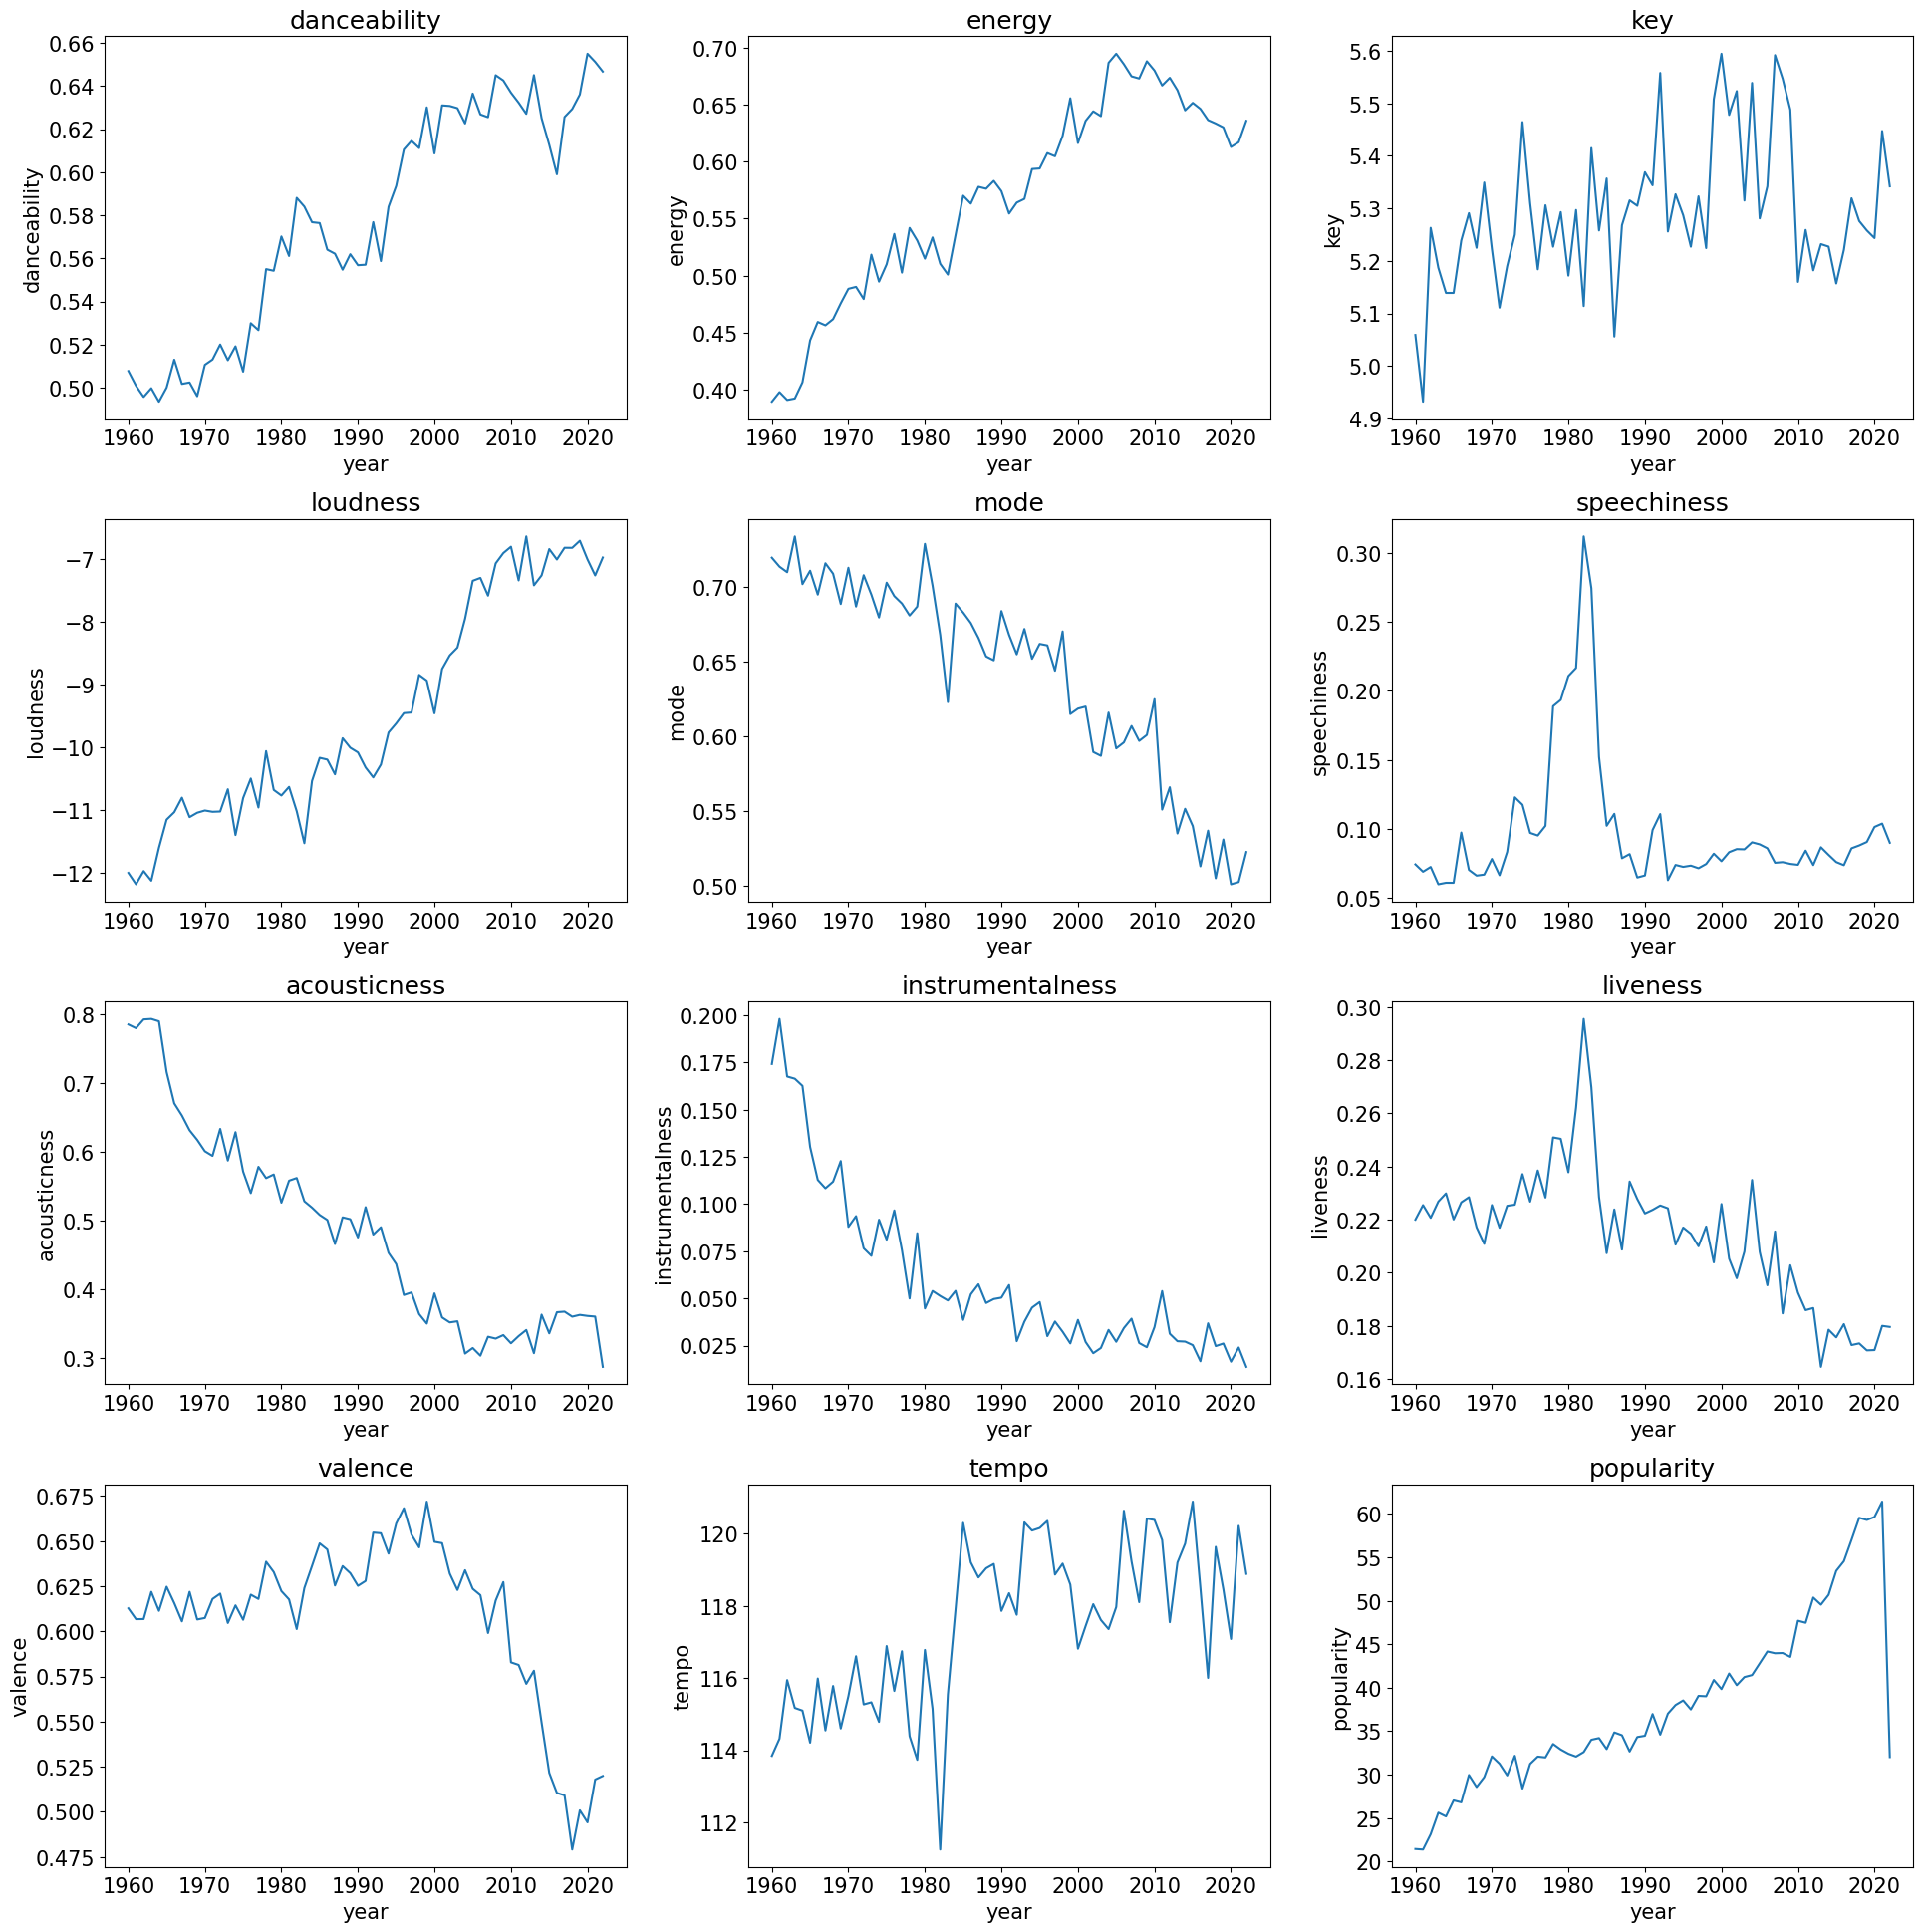

In [25]:
fig, axes = plt.subplots(4,3,figsize=(20,20))
# fig.delaxes(axes[3][2])
fig.tight_layout(pad=3)

for i, ax in enumerate(axes.ravel()):
    sns.lineplot(data=mean_by_yr,x='year',y=mean_by_yr.columns[i],ax=ax).set(title=mean_by_yr.columns[i])

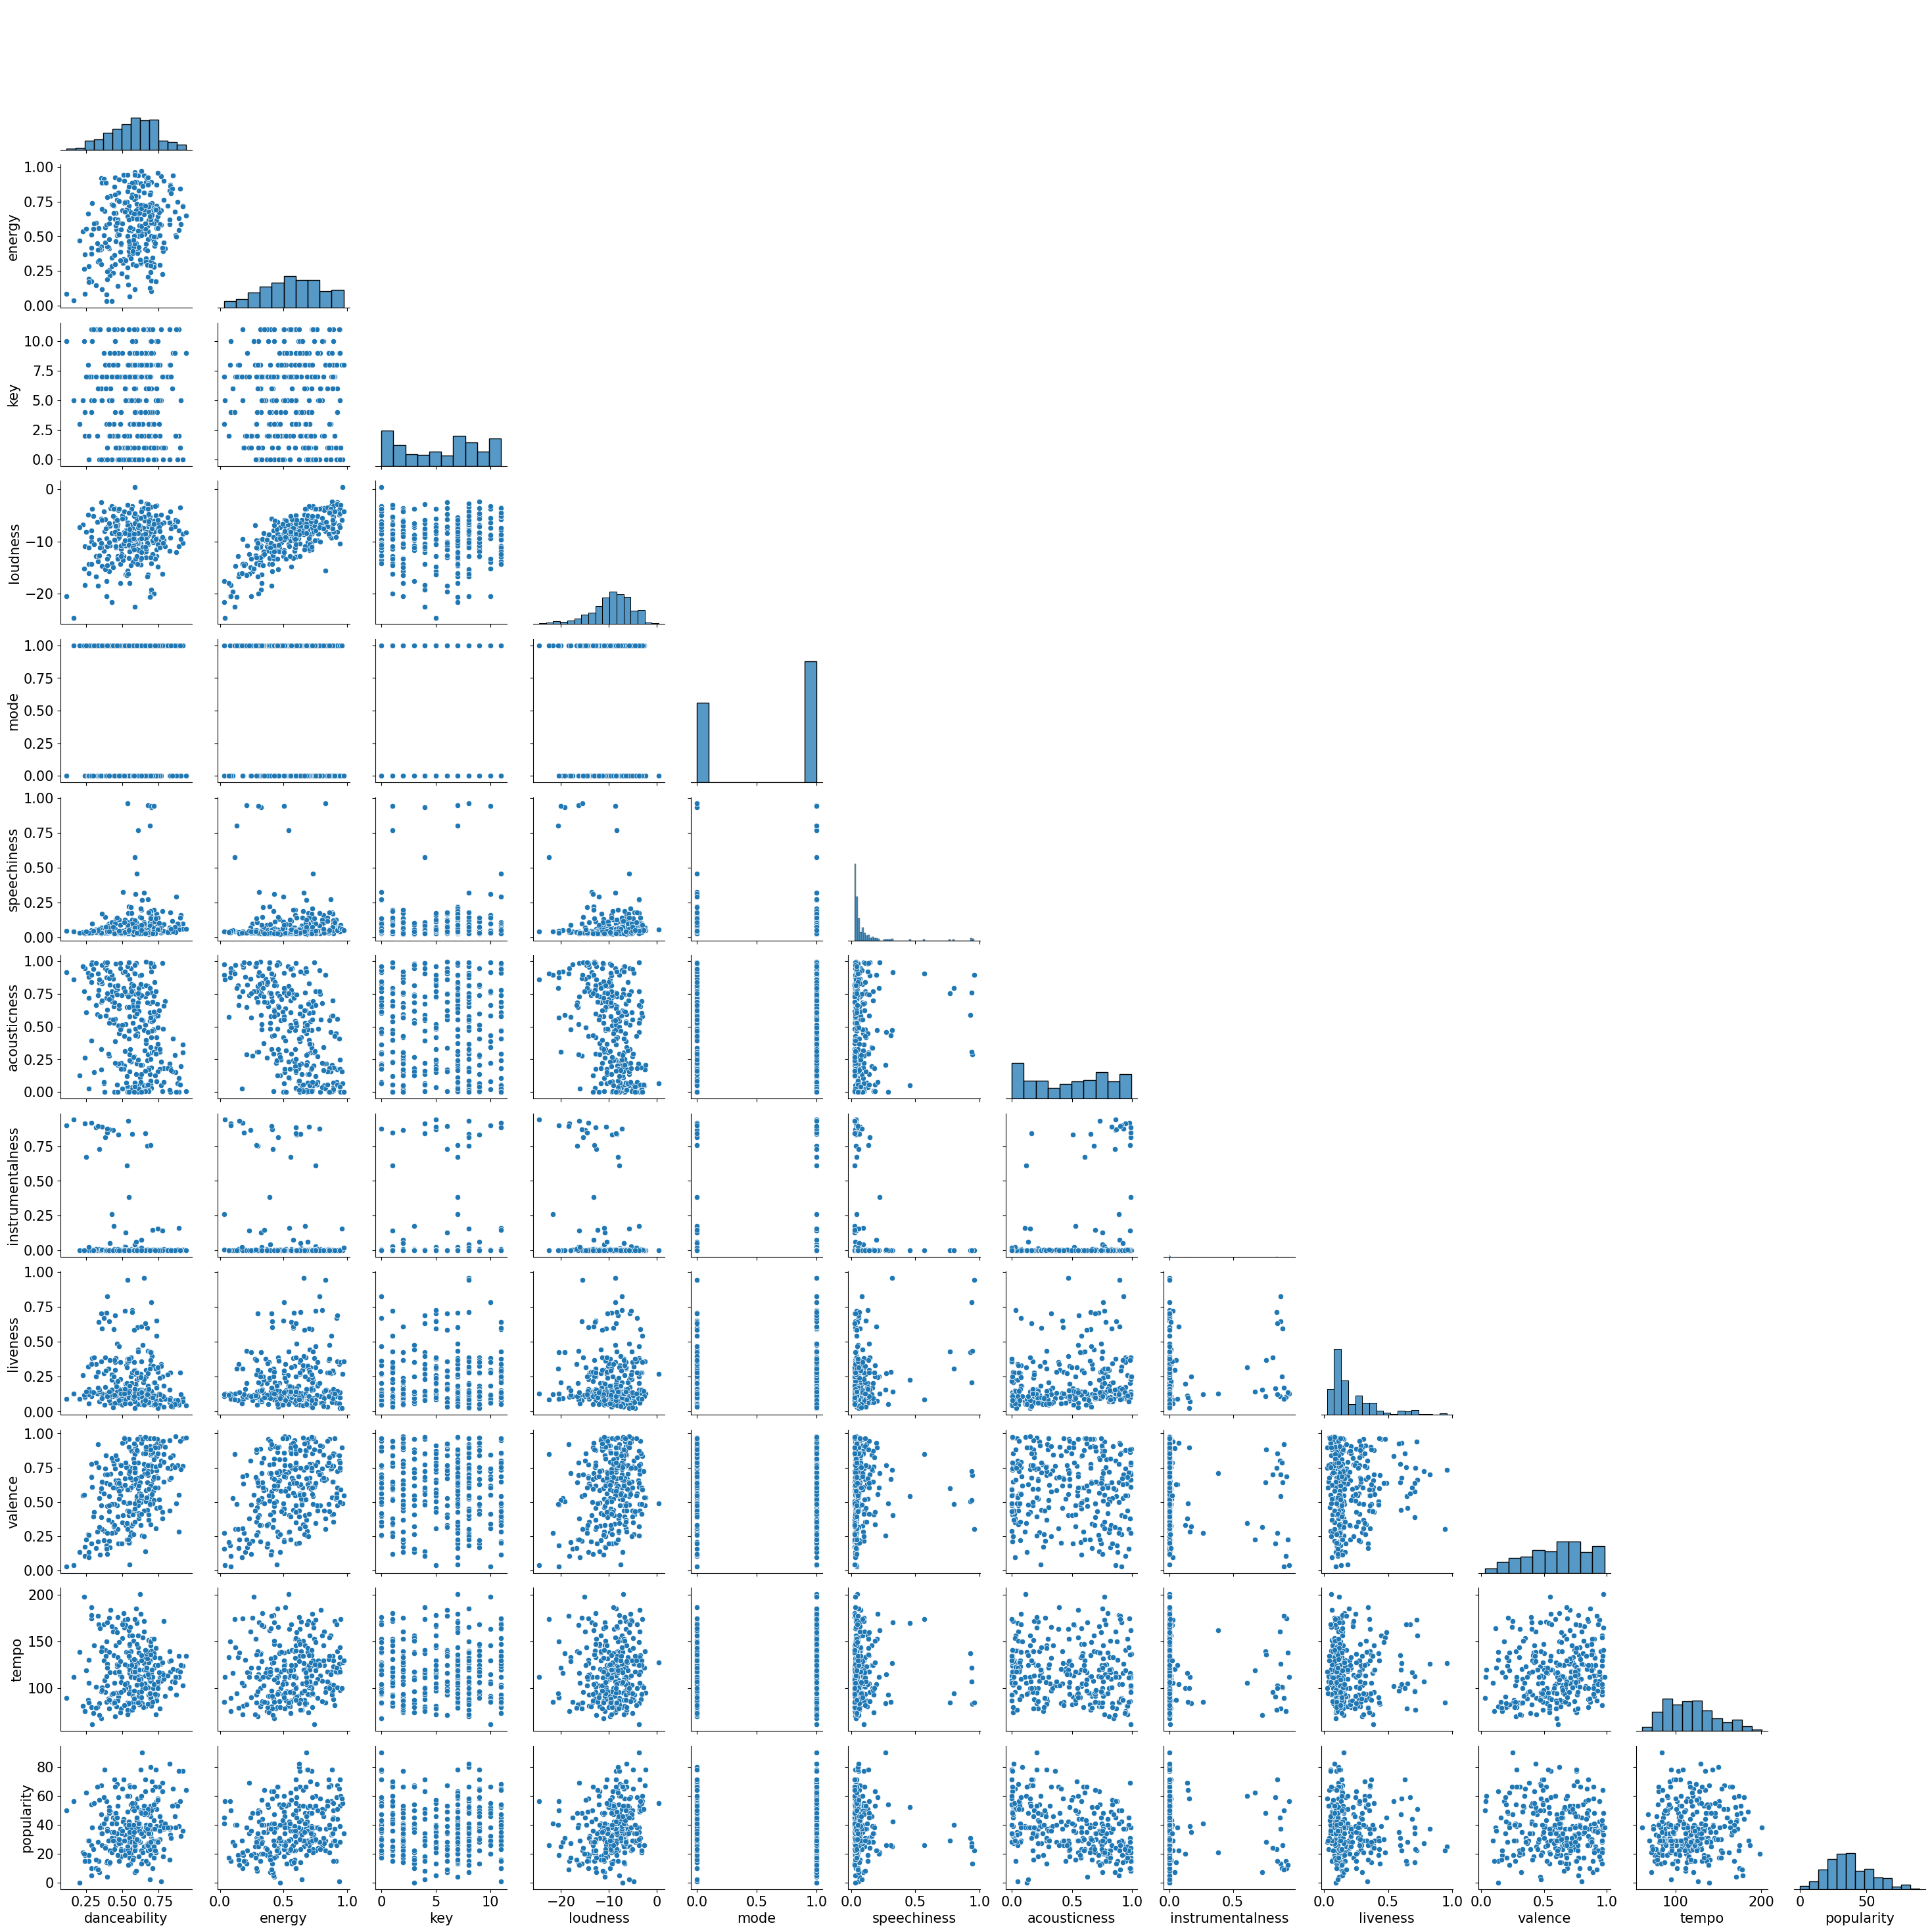

In [375]:
sns.pairplot(data=df[[*audio_feat_cols,'popularity']].sample(300),corner=True)

In [26]:
df.loc[df['year']<1980,'years_window'] = '1960 - 1979'
df.loc[(df['year']>=1980) & (df['year']<2000),'years_window'] = '1980 - 1999'
df.loc[df['year']>=2000,'years_window'] = '2000 - 2022'

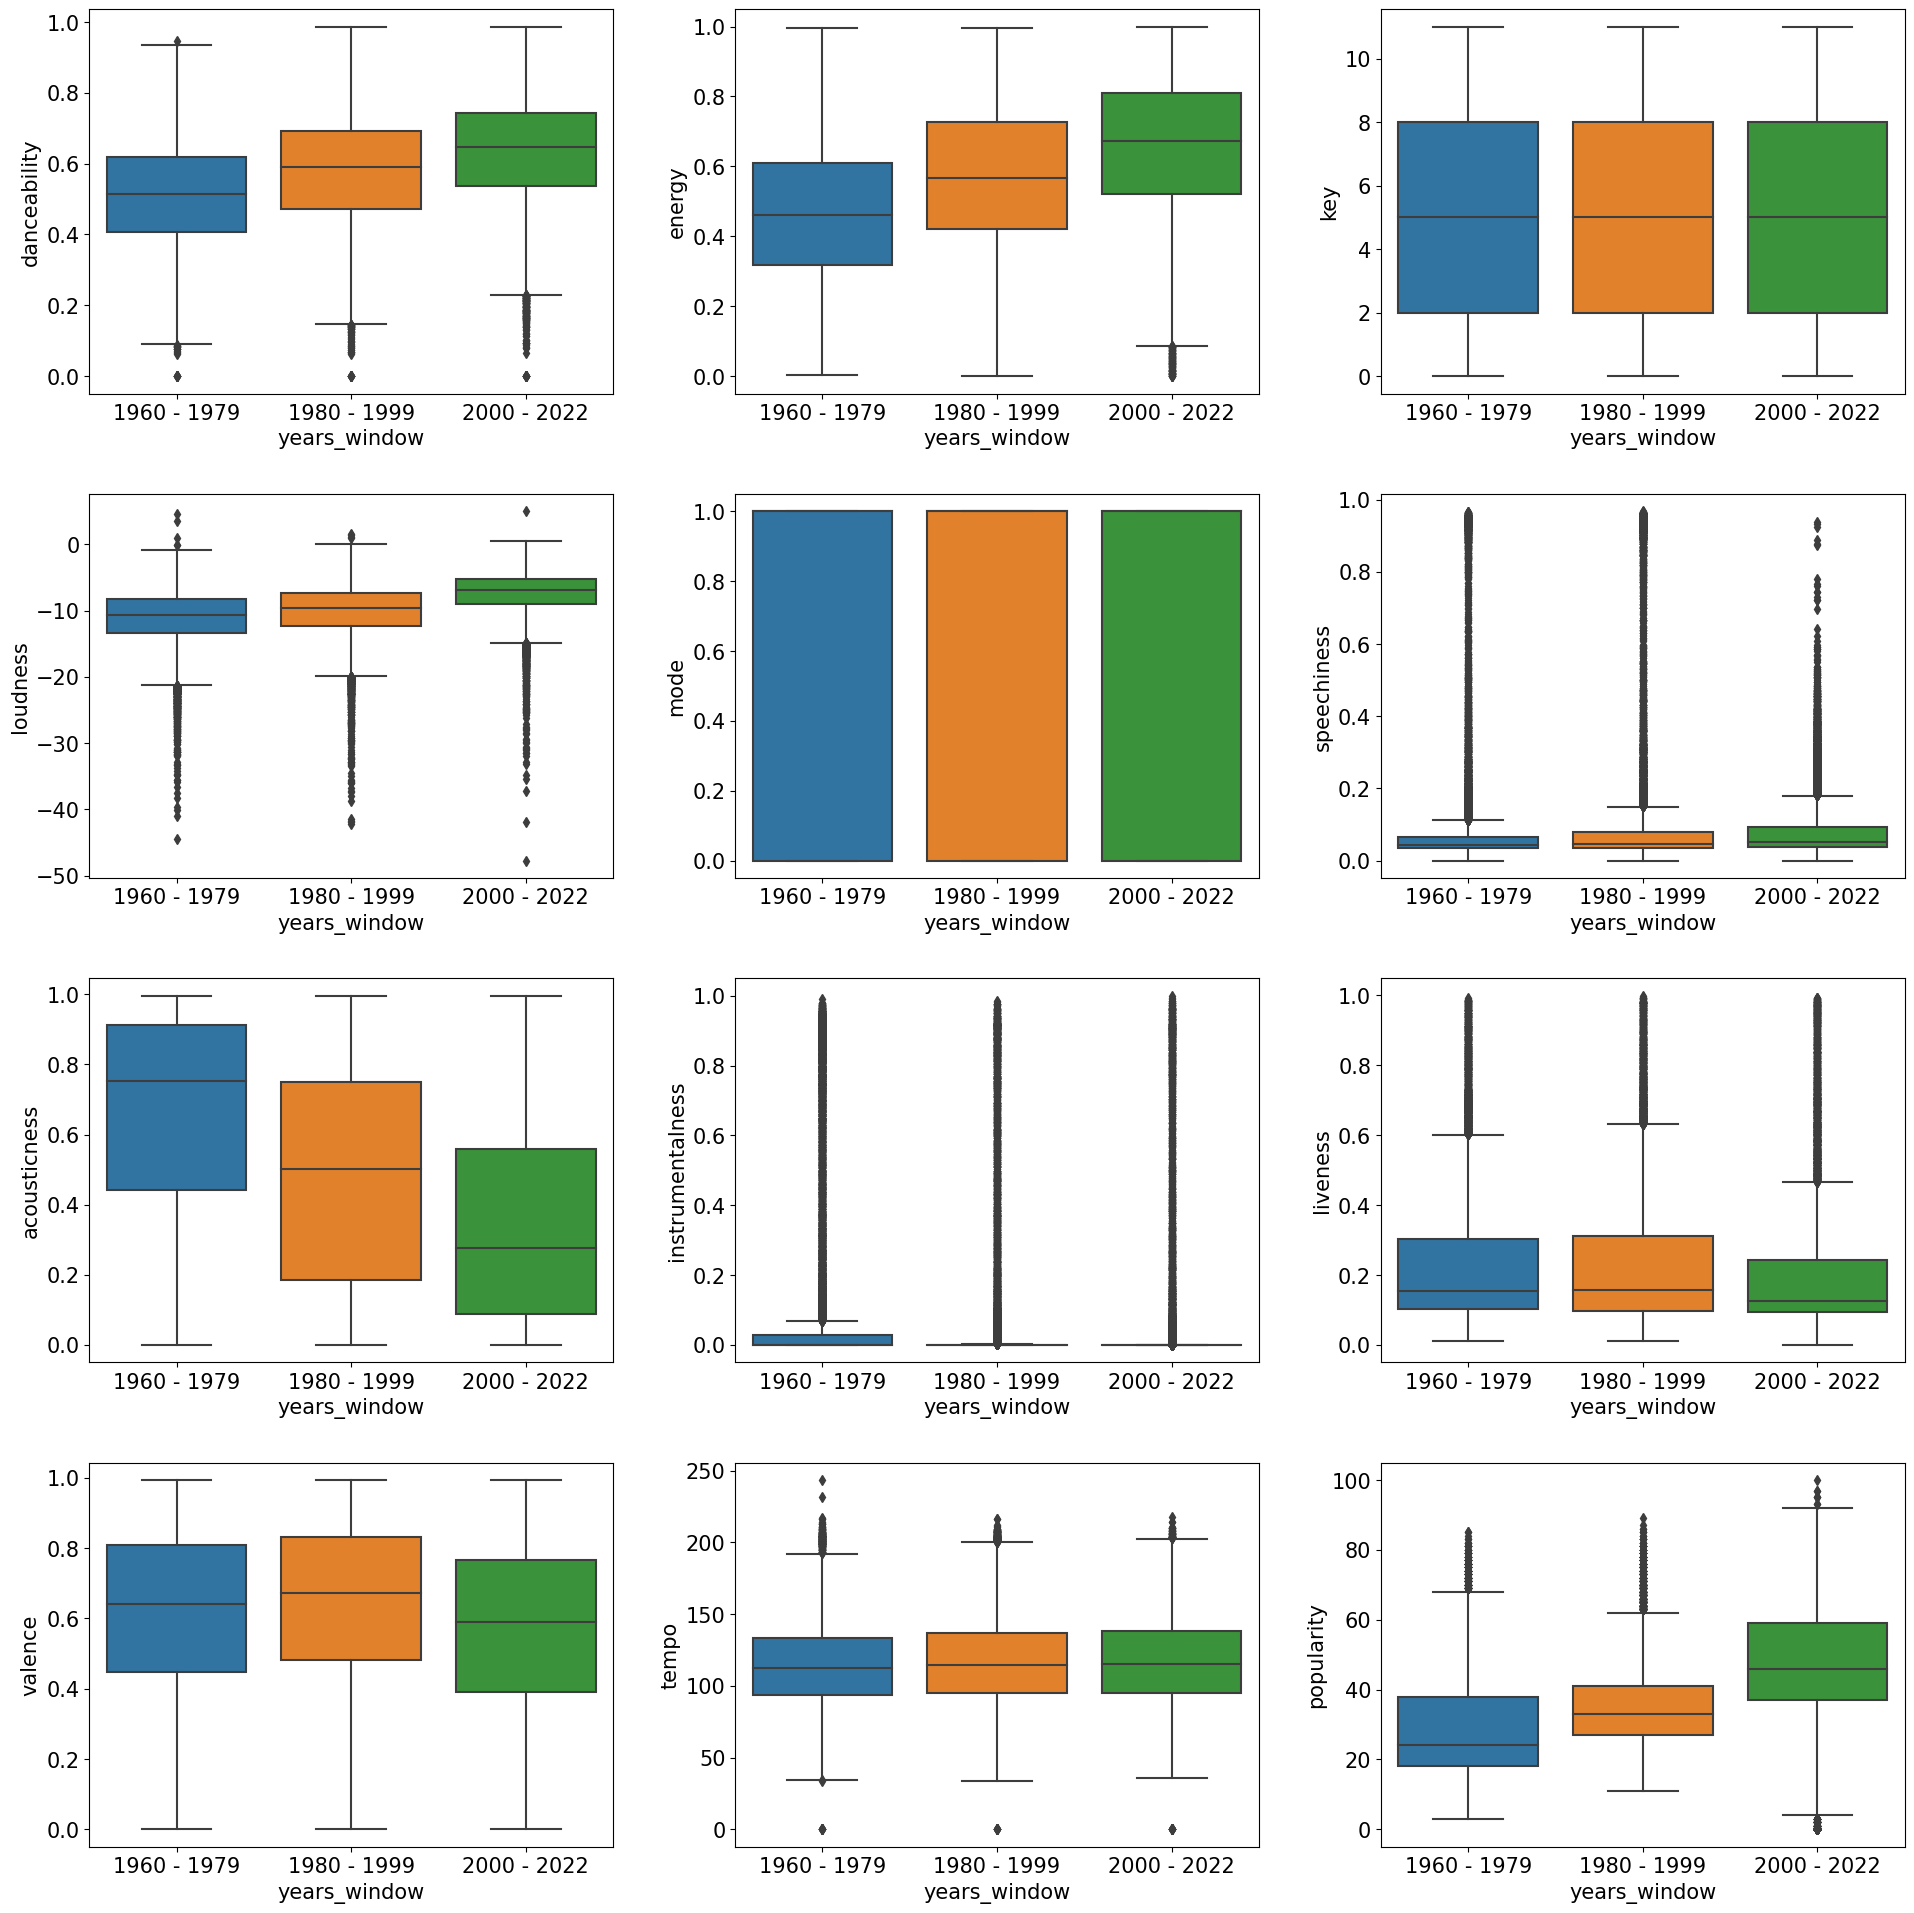

In [27]:
fig, axes = plt.subplots(4,3,figsize=(20,20))
fig.tight_layout(pad=3)

for i, ax in enumerate(axes.ravel()):
    sns.boxplot(data = df , x='years_window',y=[*audio_feat_cols,'popularity'][i],ax=ax)

In [28]:
mean_by_yr['key'] = df.groupby(['year'])['key'].agg(lambda x: int(pd.Series.mode(x)[0]))
mean_by_yr

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
year,,,,,,,,,,,,
1960,0.507707,0.389695,0,-12.004199,0.719720,0.074389,0.785713,0.174164,0.219959,0.612741,113.841166,21.439439
1961,0.500849,0.398111,7,-12.186053,0.713714,0.069084,0.780294,0.198011,0.225450,0.606733,114.317919,21.377377
1962,0.495651,0.391213,5,-11.975397,0.710000,0.072529,0.793116,0.167527,0.220645,0.606789,115.944643,23.144000
1963,0.499725,0.392508,0,-12.129115,0.734000,0.059993,0.793825,0.166369,0.226781,0.621881,115.172024,25.621000
1964,0.493449,0.406681,5,-11.603606,0.702000,0.061081,0.790348,0.162585,0.229858,0.611342,115.097638,25.184000
...,...,...,...,...,...,...,...,...,...,...,...,...
2018,0.629339,0.633406,4,-6.819686,0.505000,0.088092,0.359780,0.024739,0.173364,0.479097,119.639367,59.557000
2019,0.636093,0.629977,0,-6.706410,0.531000,0.090613,0.362427,0.026119,0.170736,0.500828,118.462496,59.311000
2020,0.655014,0.612785,1,-7.004906,0.501002,0.101477,0.360895,0.016484,0.170852,0.494139,117.084759,59.655311


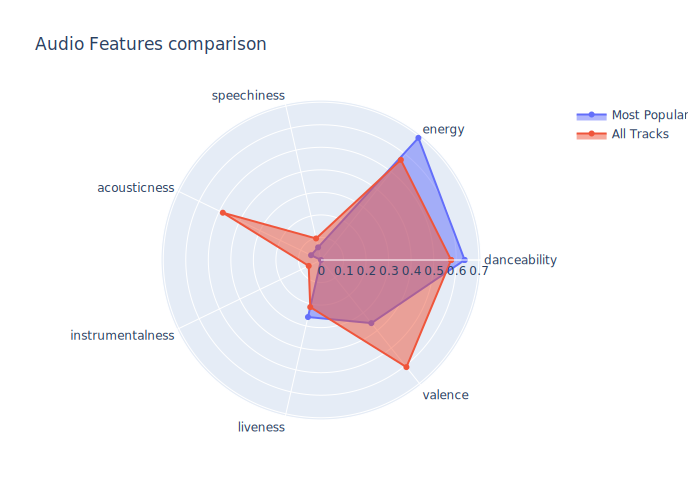

In [13]:
import plotly.graph_objects as go
import plotly.offline as pyo

categories = list(audio_feat_cols[:2])+list(audio_feat_cols[5:-1]) #['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence']
categories = [*categories, categories[0]]
most_popular = df.loc[df['popularity']>95,categories].mean().values
all_tracks = df[categories].mean().values

fig = go.Figure(
    data=[
        go.Scatterpolar(r=most_popular, theta=categories,fill='toself', name='Most Popular'),
        go.Scatterpolar(r=all_tracks, theta=categories, fill='toself', name='All Tracks')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Audio Features comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

# pyo.iplot(fig)  #for interactive radar plot
fig.show("svg")
# pyo.plot(fig)

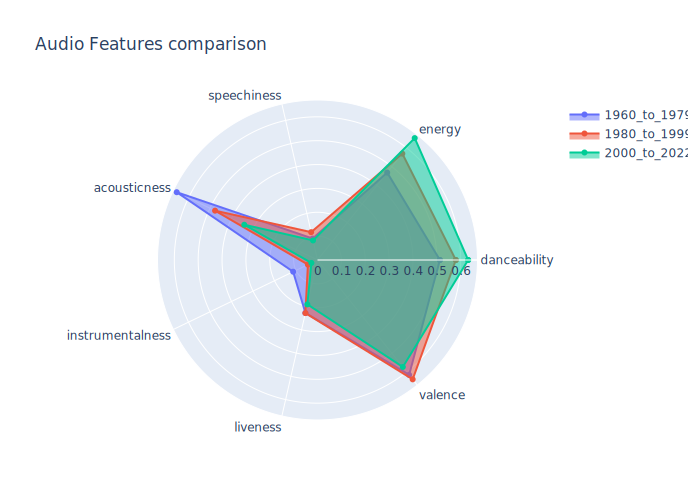

In [15]:
tracks_1960_to_1979 = df.loc[df['years_window']=='1960 - 1979',categories].mean().values
tracks_1980_to_1999 = df.loc[df['years_window']=='1980 - 1999',categories].mean().values
tracks_2000_to_2022 = df.loc[df['years_window']=='2000 - 2022',categories].mean().values
all_tracks = df[categories].mean().values

fig = go.Figure(
    data=[
        go.Scatterpolar(r=tracks_1960_to_1979, theta=categories,fill='toself', name='1960_to_1979'),
        go.Scatterpolar(r=tracks_1980_to_1999, theta=categories, fill='toself', name='1980_to_1999'),
        go.Scatterpolar(r=tracks_2000_to_2022, theta=categories, fill='toself', name='2000_to_2022')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Audio Features comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

# pyo.iplot(fig)
fig.show("svg")

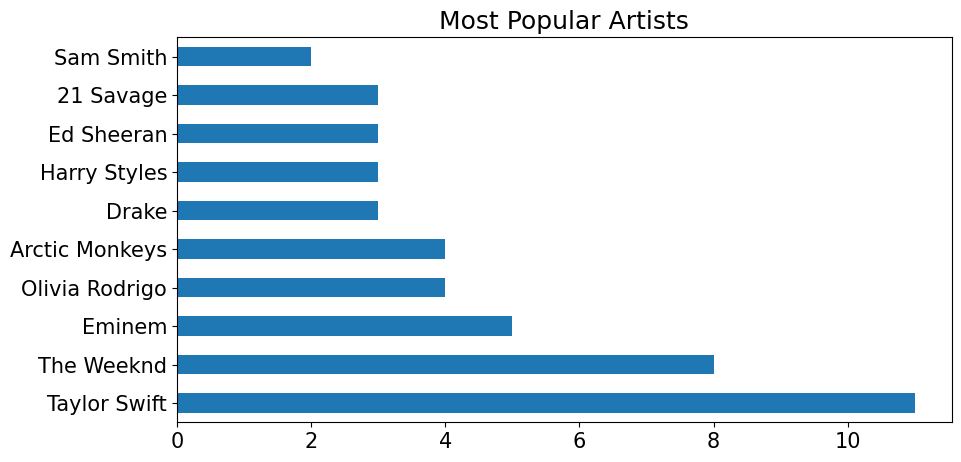

In [38]:
plt.figure(figsize=(10,5))
threshold = 85
df.loc[df['popularity']>threshold,'artists_name'].explode().value_counts().sort_values(ascending=False).head(10).plot.barh()
plt.title('Most Popular Artists')
plt.show()

# Most Popular Artists over the Years

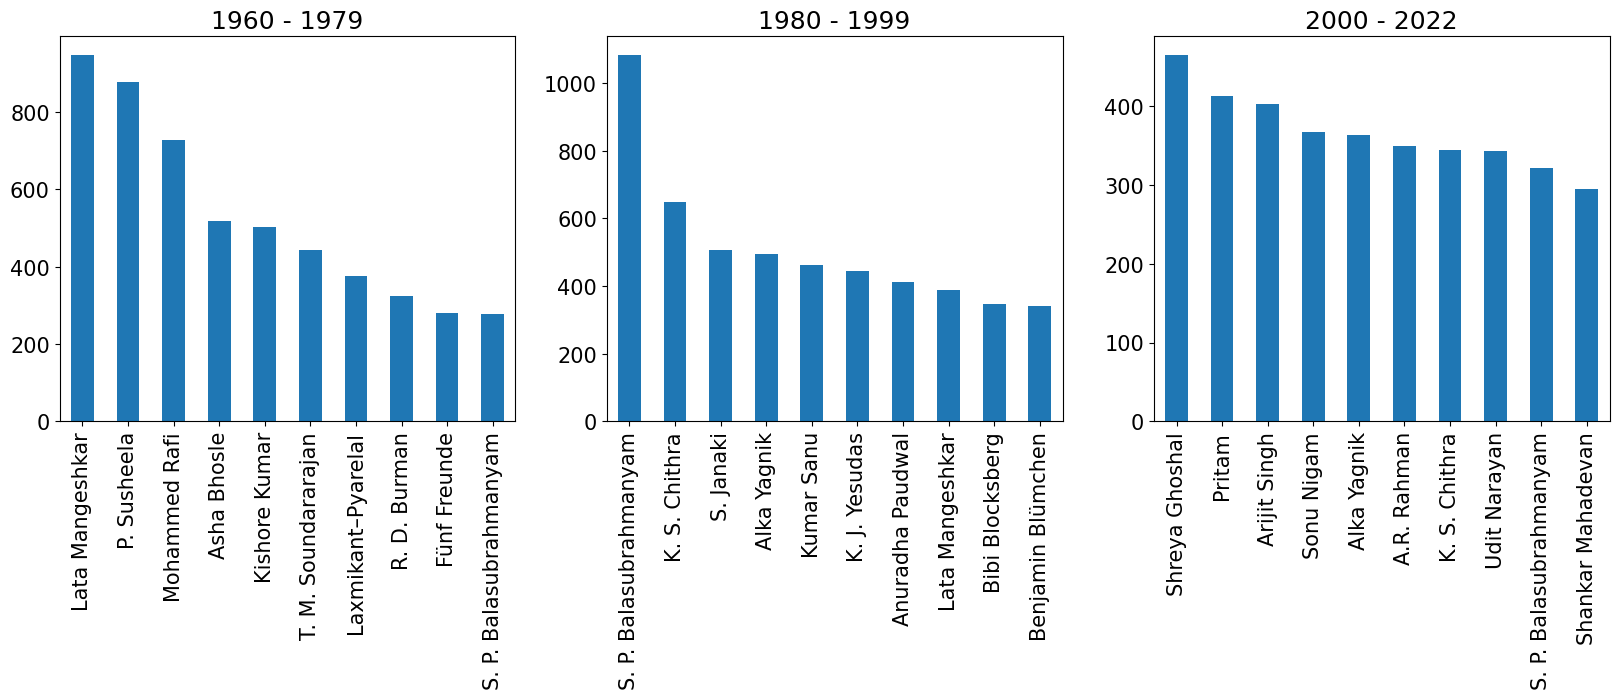

In [39]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))
df.loc[df['no_of_artists']>1,'artists_name']
for idx, val in enumerate(df['years_window'].unique()):
    df.loc[(df['years_window']==val),'artists_name'].explode().value_counts().sort_values(ascending=False).head(10).plot.bar(ax=ax[idx])
    ax[idx].set_title(val)

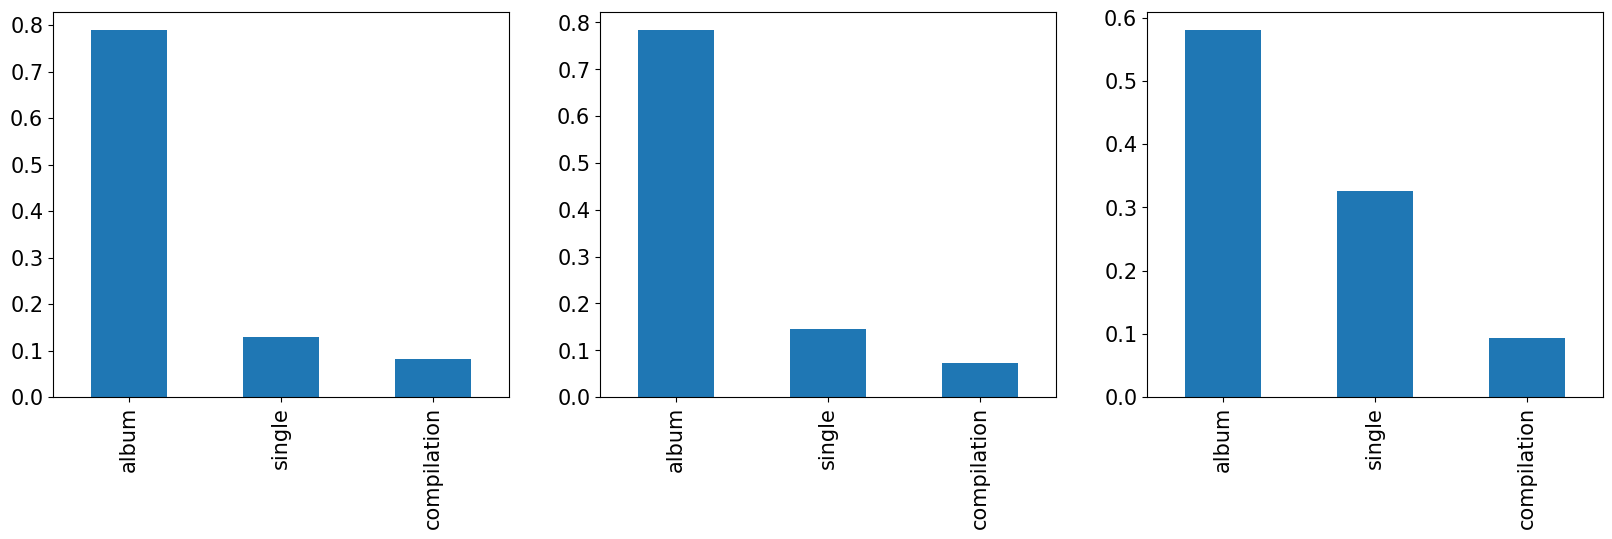

In [40]:
fig, axes = plt.subplots(ncols=3, figsize=(20,5))
for idx, val in enumerate(df['years_window'].unique()):
    (df.loc[(df['years_window']==val),'album_type'].value_counts()/(len(df[(df['years_window']==val)]))).plot.bar(ax=axes[idx])

# Clustering

In [78]:
scaler = StandardScaler()
X = scaler.fit_transform(df[audio_feat_cols])

In [57]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

for n in range(1, 12):
    
    PCAmod = PCA(n_components=n)
    PCAmod.fit(X)

    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))

    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': audio_feat_cols,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.241241
2,PCA(n_components=2),0.363026
3,PCA(n_components=3),0.466735
4,PCA(n_components=4),0.568626
5,PCA(n_components=5),0.658251
6,PCA(n_components=6),0.740698
7,PCA(n_components=7),0.820372
8,PCA(n_components=8),0.895678
9,PCA(n_components=9),0.947119


In [58]:
feature_weight_list[7]

,n,features,values
0,8,danceability,0.076517
1,8,energy,0.063085
2,8,key,0.109905
3,8,loudness,0.071085
4,8,mode,0.106787
5,8,speechiness,0.085790
6,8,acousticness,0.074582
7,8,instrumentalness,0.105367
8,8,liveness,0.085323
9,8,valence,0.107376


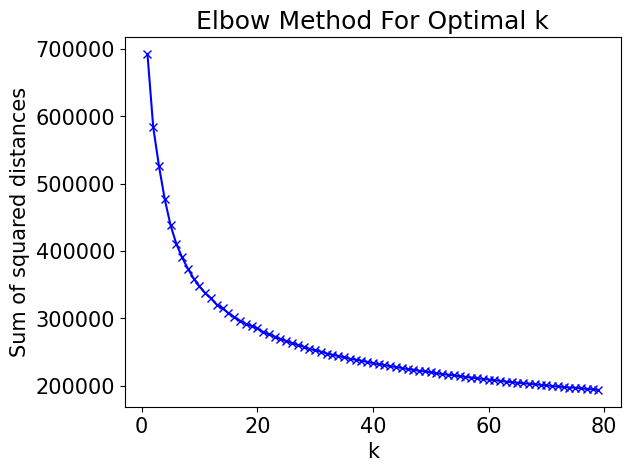

In [25]:
ss_dist = []
K = range(1, 80)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', random_state=123)
    km = km.fit(X)
    ss_dist.append(km.inertia_)
plt.plot(K, ss_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [26]:
km = KMeans(n_clusters=40, init='k-means++', random_state=123)
km = km.fit(X)

In [34]:
X = pd.DataFrame(X,columns=audio_feat_cols)
X['KMeans'] = km.predict(X.values)
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,KMeans
0,-1.930098,-1.011028,-0.084243,0.198762,0.748866,-0.423676,0.196332,-0.246419,0.673592,-1.182903,-1.012289,9
1,-0.339472,-1.323124,0.493045,0.572373,0.748866,-0.426145,1.283814,-0.315916,-0.396158,-0.350438,-0.666239,9
2,-1.147510,-0.038024,-1.527463,0.462190,0.748866,0.173125,1.280724,-0.315901,2.188131,0.376385,1.816007,15
3,-0.784847,-0.827442,-1.238819,-1.880520,0.748866,-0.323695,1.345602,-0.310377,-0.753116,0.270742,-0.167618,2
4,-0.224946,-1.323124,-0.950175,-1.327200,0.748866,-0.378006,1.534058,2.756576,-0.570696,0.435545,-0.051470,13
...,...,...,...,...,...,...,...,...,...,...,...,...
62978,0.150441,-0.735650,-0.084243,0.065724,0.748866,-0.417504,-0.220742,-0.315916,-0.593217,-0.654689,1.093959,22
62979,0.583092,0.939570,-1.527463,0.923371,0.748866,0.339760,-1.376191,-0.315916,-0.570696,-0.975843,-0.793314,19
62980,0.697617,0.976288,-1.238819,1.118957,0.748866,-0.277407,-1.382061,-0.315916,-0.781830,0.338353,-0.689071,21
62981,2.078280,0.912033,1.070333,1.815901,0.748866,0.827322,-1.352403,-0.315868,-0.801536,0.203131,-0.993437,0


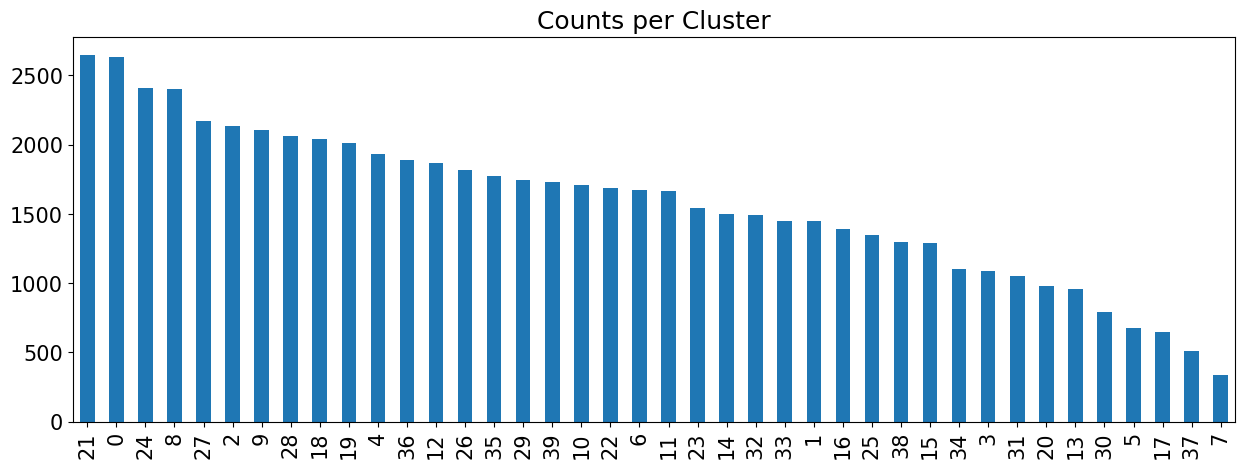

In [39]:
X['KMeans'].value_counts().plot(kind='bar',figsize=(15,5))
plt.title('Counts per Cluster')
plt.show()

In [232]:
from sklearn.mixture import GaussianMixture

gaussian_model = GaussianMixture(n_components=6)

X['GaussianMixture'] = gaussian_model.fit_predict(X[audio_feat_cols].values)

In [61]:
X.insert(11,'popularity',df['popularity'])

In [62]:
X.groupby(['GaussianMixture'])['popularity'].agg(['mean','max','min'])

,mean,max,min
GaussianMixture,,,
0,32.463636,89,0
1,34.965607,92,0
2,37.116226,92,0
3,40.161176,97,0
4,27.972696,81,6
5,38.897995,100,0


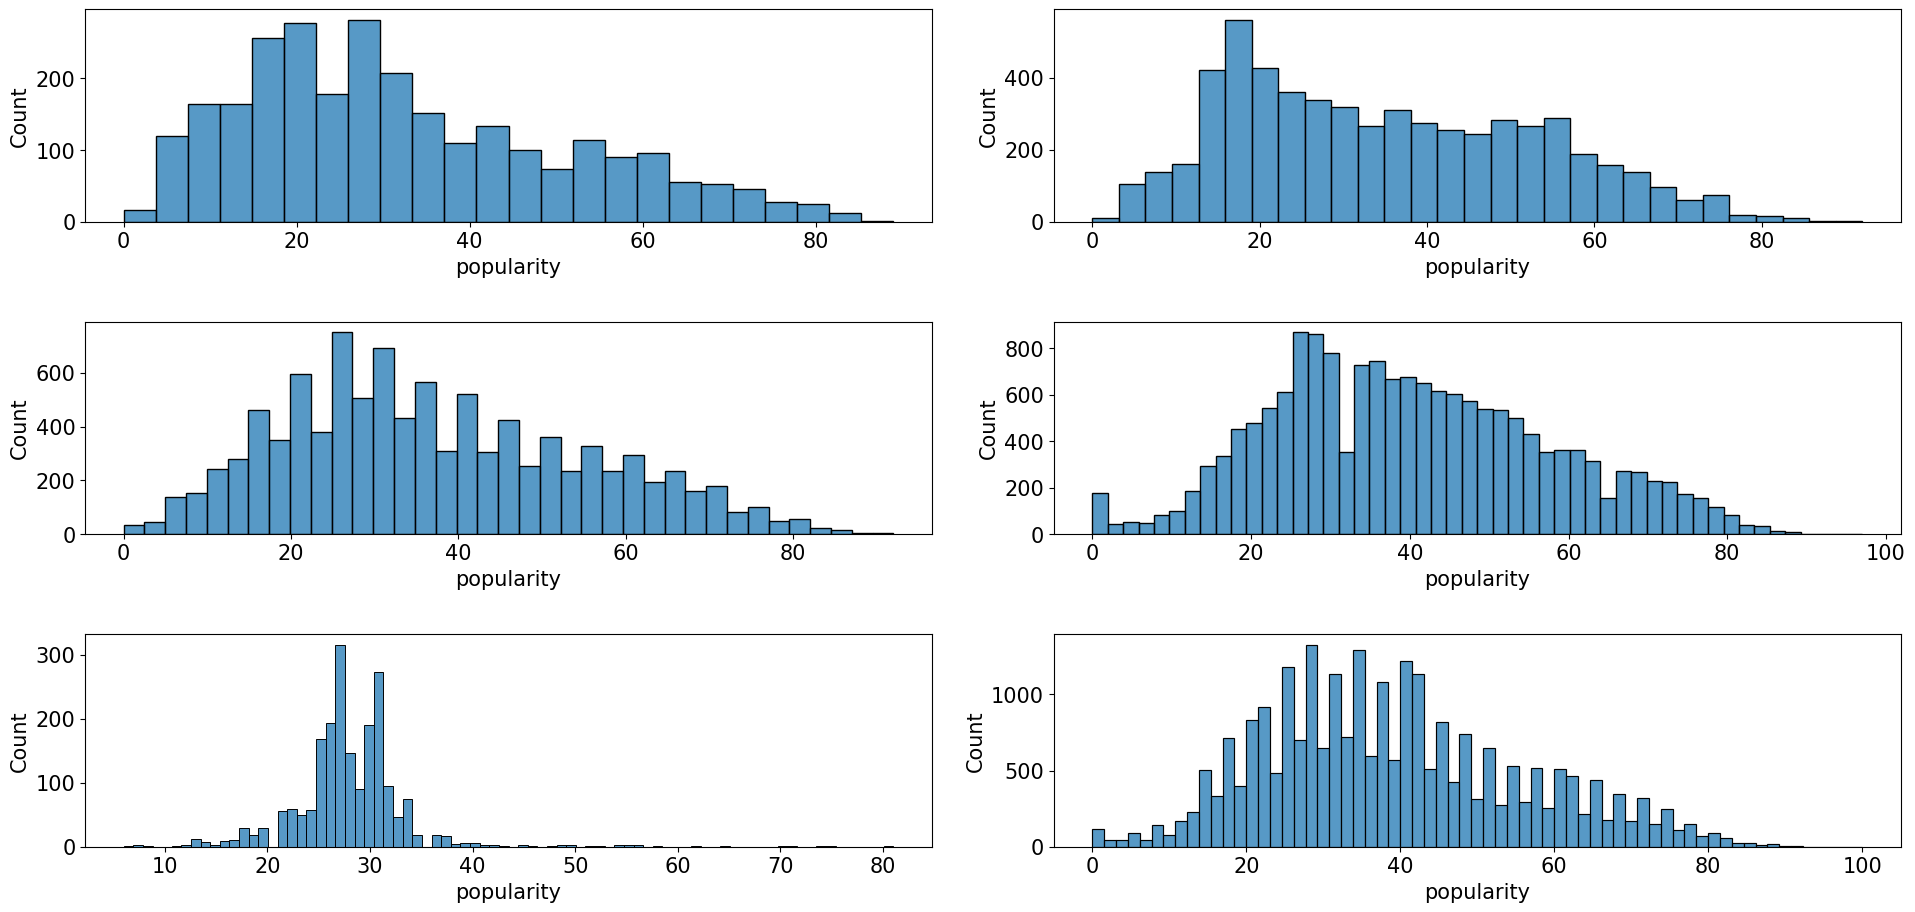

In [64]:
fig, axes = plt.subplots(3,2, figsize=(20,10))

fig.tight_layout(pad=3)

for i, ax in enumerate(axes.ravel()):
    sns.histplot(data=X[X['GaussianMixture']==i],x='popularity',ax=ax).set(title=i + ' Cluster')

In [79]:
feat_cols_ohe = ['key','mode']
feat_cols_float = ['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

X = df[feat_cols_float]

minMaxScaler = MinMaxScaler()
X = pd.DataFrame(minMaxScaler.fit_transform(X),columns=feat_cols_float)

In [80]:
X[feat_cols_ohe] = df[feat_cols_ohe].astype(int)
X['name'] = df['name']

In [81]:
X['polarity'] = X['name'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [82]:
X['subjectivity'] = X['name'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [83]:
X.drop(columns=['name'],inplace=True)

In [84]:
X['polarity'] = X['polarity'].apply(lambda x: 'Negative' if x<0 else ('Positive' if x>0 else 'Neutral'))
X['subjectivity'] = X['subjectivity'].apply(lambda x: 'Low' if x<1/3 else ('High' if x>1/3 else 'Medium'))

In [85]:
X = pd.get_dummies(X,columns=['key','mode','polarity','subjectivity'],drop_first=True)
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key_1,...,key_7,key_8,key_9,key_10,key_11,mode_1,polarity_Neutral,polarity_Positive,subjectivity_Low,subjectivity_Medium
0,0.277890,0.348336,0.741753,0.030269,0.549197,0.013300,0.334334,0.329980,0.359244,0,...,0,0,0,0,0,1,1,0,1,0
1,0.531440,0.280266,0.771214,0.029855,0.902610,0.000000,0.144144,0.528169,0.401406,0,...,1,0,0,0,0,1,1,0,1,0
2,0.402637,0.560552,0.762525,0.130165,0.901606,0.000003,0.603604,0.701207,0.703836,0,...,0,0,0,0,0,1,1,0,1,0
3,0.460446,0.388376,0.577789,0.047004,0.922691,0.001060,0.080681,0.676056,0.462157,1,...,0,0,0,0,0,1,1,0,1,0
4,0.549696,0.280266,0.621422,0.037913,0.983936,0.588000,0.113113,0.715292,0.476308,0,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62978,0.609533,0.408397,0.731262,0.031302,0.413655,0.000000,0.109109,0.455734,0.615864,0,...,0,0,0,0,0,1,1,0,1,0
62979,0.678499,0.773769,0.798892,0.158058,0.038153,0.000000,0.113113,0.379276,0.385924,0,...,0,0,0,0,0,1,1,0,1,0
62980,0.696755,0.781778,0.814315,0.054752,0.036245,0.000000,0.075576,0.692153,0.398624,1,...,0,0,0,0,0,1,0,1,0,0
62981,0.916836,0.767763,0.869273,0.239669,0.045884,0.000009,0.072072,0.659960,0.361541,0,...,0,0,1,0,0,1,1,0,1,0


In [86]:
feat_cols = X.columns
feat_cols

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'key_1', 'key_2',
       'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11', 'mode_1', 'polarity_Neutral', 'polarity_Positive',
       'subjectivity_Low', 'subjectivity_Medium'],
      dtype='object')

In [87]:
X[['id','name','popularity']] = df[['id','name','popularity']]

# Recommendation Engine

In [88]:
playlist = []
for i in sp.playlist('6Rc8Kf2qO4Qdri0zpLVueH')['tracks']['items']:
    playlist.append(i['track'])

In [89]:
playlist = pd.DataFrame(playlist)
playlist = playlist.merge(pd.DataFrame(sp.audio_features(playlist['id'])),on='id',how='left')

In [90]:
playlist

,album,artists,available_markets,disc_number,duration_ms_x,episode,explicit,external_ids,external_urls,href,...,instrumentalness,liveness,valence,tempo,type_y,uri_y,track_href,analysis_url,duration_ms_y,time_signature
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,267866,False,False,{'isrc': 'GBAYE1400217'},{'spotify': 'https://open.spotify.com/track/0F...,https://api.spotify.com/v1/tracks/0FDzzruyVECA...,...,0.001970,0.2090,0.1620,124.970,audio_features,spotify:track:0FDzzruyVECATHXKHFs9eJ,https://api.spotify.com/v1/tracks/0FDzzruyVECA...,https://api.spotify.com/v1/audio-analysis/0FDz...,267867,4
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,258266,False,False,{'isrc': 'GBAYE1500979'},{'spotify': 'https://open.spotify.com/track/3R...,https://api.spotify.com/v1/tracks/3RiPr603aXAo...,...,0.000007,0.3250,0.4120,90.027,audio_features,spotify:track:3RiPr603aXAoi4GHyXx0uy,https://api.spotify.com/v1/tracks/3RiPr603aXAo...,https://api.spotify.com/v1/audio-analysis/3RiP...,258267,4
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,177506,False,False,{'isrc': 'USUM71201071'},{'spotify': 'https://open.spotify.com/track/5q...,https://api.spotify.com/v1/tracks/5qaEfEh1AtSd...,...,0.000250,0.2690,0.4280,89.938,audio_features,spotify:track:5qaEfEh1AtSdrdrByCP7qR,https://api.spotify.com/v1/tracks/5qaEfEh1AtSd...,https://api.spotify.com/v1/audio-analysis/5qaE...,177507,4
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,204346,False,False,{'isrc': 'USUM71700626'},{'spotify': 'https://open.spotify.com/track/0p...,https://api.spotify.com/v1/tracks/0pqnGHJpmpxL...,...,0.000000,0.0810,0.6660,124.949,audio_features,spotify:track:0pqnGHJpmpxLKifKRmU6WP,https://api.spotify.com/v1/tracks/0pqnGHJpmpxL...,https://api.spotify.com/v1/audio-analysis/0pqn...,204347,4
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,187146,False,False,{'isrc': 'USUM71704167'},{'spotify': 'https://open.spotify.com/track/1z...,https://api.spotify.com/v1/tracks/1zB4vmk8tFRm...,...,0.134000,0.1470,0.2880,167.997,audio_features,spotify:track:1zB4vmk8tFRmM9UULNzbLB,https://api.spotify.com/v1/tracks/1zB4vmk8tFRm...,https://api.spotify.com/v1/audio-analysis/1zB4...,187147,4
5,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,240306,False,False,{'isrc': 'USUM71200987'},{'spotify': 'https://open.spotify.com/track/7M...,https://api.spotify.com/v1/tracks/7MXlTgQeo3IV...,...,0.000000,0.1440,0.8600,105.009,audio_features,spotify:track:7MXlTgQeo3IVlMpLnZuhxc,https://api.spotify.com/v1/tracks/7MXlTgQeo3IV...,https://api.spotify.com/v1/audio-analysis/7MXl...,240307,4
6,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,247941,False,False,{'isrc': 'INS172000162'},{'spotify': 'https://open.spotify.com/track/1s...,https://api.spotify.com/v1/tracks/1smFN2CLqGRO...,...,0.000000,0.1520,0.3190,135.875,audio_features,spotify:track:1smFN2CLqGROu0J0UyvDfL,https://api.spotify.com/v1/tracks/1smFN2CLqGRO...,https://api.spotify.com/v1/audio-analysis/1smF...,247941,4
7,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,245735,False,False,{'isrc': 'INS172000449'},{'spotify': 'https://open.spotify.com/track/2L...,https://api.spotify.com/v1/tracks/2L2YNB3YIlet

In [91]:
minMaxScaler = MinMaxScaler()
playlist[feat_cols_float] = minMaxScaler.fit_transform(playlist[feat_cols_float])

In [92]:
playlist['polarity'] = playlist['name'].apply(lambda x: TextBlob(x).sentiment.polarity)
playlist['subjectivity'] = playlist['name'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
playlist['polarity'] = playlist['polarity'].apply(lambda x: 'Negative' if x<0 else ('Positive' if x>0 else 'Neutral'))
playlist['subjectivity'] = playlist['subjectivity'].apply(lambda x: 'Low' if x<1/3 else ('High' if x>1/3 else 'Medium'))

In [93]:
playlist = pd.get_dummies(playlist,columns=['key','mode','polarity','subjectivity'],drop_first=True)

In [94]:
playlist_X = pd.DataFrame(columns=feat_cols)
playlist_X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key_1,...,key_7,key_8,key_9,key_10,key_11,mode_1,polarity_Neutral,polarity_Positive,subjectivity_Low,subjectivity_Medium


In [95]:
playlist_X[feat_cols_float] = playlist[feat_cols_float]

In [96]:
for i in ['key','mode','polarity','subjectivity']:
    playlist_X[playlist_X.columns[playlist_X.columns.str.contains(i)]] = 0
    playlist_X[playlist.columns[playlist.columns.str.contains(i)]] = playlist[playlist.columns[playlist.columns.str.contains(i)]]

In [97]:
playlist_X[['id','name']]= playlist[['id','name']]

In [98]:
playlist_X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key_1,...,key_9,key_10,key_11,mode_1,polarity_Neutral,polarity_Positive,subjectivity_Low,subjectivity_Medium,id,name
0,0.416667,0.656115,0.662800,0.000000,0.000000,0.014701,0.445993,0.136459,0.484737,0,...,0,0,0,1,0,1,0,0,0FDzzruyVECATHXKHFs9eJ,A Sky Full of Stars
1,0.280303,0.682014,0.661532,0.043153,0.224883,0.000052,0.850174,0.445750,0.155412,0,...,0,0,0,0,1,0,1,0,3RiPr603aXAoi4GHyXx0uy,Hymn for the Weekend
2,0.315657,0.706475,1.000000,0.018494,0.201827,0.001866,0.655052,0.465545,0.154573,0,...,0,0,0,1,1,0,1,0,5qaEfEh1AtSdrdrByCP7qR,Demons
3,1.000000,0.807194,0.867518,0.440775,0.061515,0.000000,0.000000,0.759990,0.484539,0,...,0,1,0,0,1,0,1,0,0pqnGHJpmpxLKifKRmU6WP,Believer
4,0.568182,0.867626,0.822772,0.070013,0.000593,1.000000,0.229965,0.292342,0.890250,0,...,0,0,0,1,1,0,1,0,1zB4vmk8tFRmM9UULNzbLB,Thunder
5,0.696970,0.956835,0.831059,0.040951,0.011012,0.000000,0.219512,1.000000,0.296612,0,...,0,0,0,1,1,0,1,0,7MXlTgQeo3IVlMpLnZuhxc,It's Time
6,0.260101,0.358273,0.548937,0.027301,0.853979,0.000000,0.247387,0.330694,0.587512,0,...,0,0,0,1,1,0,1,0,1smFN2CLqGROu0J0UyvDfL,Shayad
7,0.131313,0.454676,0.578378,0.018054,0.985727,0.004784,0.073171,0.334406,0.587267,0,...,0,0,0,1,1,0,1,0,2L2YNB3YIletW4fUtwphDv,Shayad - Reprise
8,0.000000,0.000000,0.000000,0.034786,1.000000,0.077612,0.005923,0.000000,0.000000,0,...,0,0,0,0,1,0,1,0,73SpzrcaHk0RQPFP73vqVR,No Time To Die
9,0.792929,0.792806,0.773835,0.533245,0.186456,0.000082,0.128920,0.137696,0.493549,0,...,0,0,0,1,1,0,1,0,0E9ZjEAyAwOXZ7wJC0PD33,In My Mind


In [99]:
playlist_X.set_index('id',inplace=True,drop=False)
X.set_index('id',inplace=True,drop=False)

In [105]:
def recommend_cos_sim(tracks,playlist):
    
    playlist_feat = tracks.loc[tracks['id'].isin(playlist['id'].values),:][feat_cols]
    playlist_feat = pd.DataFrame(playlist_feat.sum(axis=0)).T
    
    non_playlist_feat = tracks.loc[~(tracks['id'].isin(playlist['id'].values)),['name',*feat_cols]]
    non_playlist_feat['similarity'] = cosine_similarity(non_playlist_feat[feat_cols].values,playlist_feat.values)
    return non_playlist_feat.sort_values(['similarity'],ascending=False).head(50)

In [106]:
recommendations = recommend_cos_sim(X,playlist_X)

In [107]:
recommendations

,name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key_8,key_9,key_10,key_11,mode_1,polarity_Neutral,polarity_Positive,subjectivity_Low,subjectivity_Medium,similarity
id,,,,,,,,,,,,,,,,,,,,,
1FsR2mAMUgtpsDMfXJNyjf,Chatiyan vs. Jigraa,0.604462,0.902901,0.876368,0.150826,0.320281,0.000007,0.173173,0.477867,0.720991,...,0,0,0,0,1,1,0,1,0,0.978490
6EwNJz8CuVsrsLvXprJ20Q,I Know Places,0.610548,0.755751,0.810806,0.073347,0.245984,0.000000,0.178178,0.497988,0.657286,...,0,0,0,0,1,1,0,1,0,0.977400
1zkC3XLyodSNGyiYXSNg8Y,Okkasari Cheppaleva,0.696755,0.897896,0.813784,0.042149,0.259036,0.000095,0.323323,0.477867,0.575514,...,0,0,0,0,1,1,0,1,0,0.977388
3QqImhDBzvbGF5Ckj5VnT2,Que Saudade,0.676471,0.775771,0.800353,0.168388,0.254016,0.000000,0.244244,0.540241,0.616640,...,0,0,0,0,1,1,0,1,0,0.976900
4x7K1DHFEM3IxWX7CBVPhq,Villadi Villan,0.621704,0.840838,0.837858,0.192149,0.195783,0.013900,0.180180,0.467807,0.563105,...,0,0,0,0,1,1,0,1,0,0.976779
2C6WXnmZ66tHhHlnvwePiK,Die For Me (feat. Future & Halsey),0.622718,0.660654,0.851460,0.045558,0.190763,0.000000,0.211211,0.454728,0.595837,...,0,0,0,0,1,1,0,1,0,0.976478
6OnA0y7dYaNrGvk7xVUkSN,Om Namami,0.709939,0.899898,0.820481,0.052996,0.238956,0.000471,0.205205,0.306841,0.480819,...,0,0,0,0,1,1,0,1,0,0.976028
70OzwqFfeL0Mb3A9MUmA4R,"Saavar Re Mana - From ""Mitwaa""",0.685598,0.634628,0.811470,0.034401,0.386546,0.000000,0.141141,0.365191,0.550762,...,0,0,0,0,1,1,0,1,0,0.975892
1cyECXirsoofBBFIIXorj6,Saavar Re Mana,0.685598,0.634628,0.811470,0.034401,0.386546,0.000000,0.141141,0.365191,0.550762,...,0,0,0,0,1,1,0,1,0,0.975892


In [126]:
# 'release_date','year_window'
feat_cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

In [127]:
df.drop(columns=feat_cols)

,disc_number,duration_ms,explicit,id,is_local,name,popularity,track_number,type,release_date,time_signature,year,album_name,artists_name,no_of_artists,no_of_markets,years_window,album_type,album_total_tracks
0,1,179693,False,4Hhv2vrOTy89HFRcjU3QOx,False,At Last,75,7,track,1960-01-01,3.0,1960,At Last!,Etta James,1,183,1960 - 1979,album,14
1,1,223506,False,4nEKA1qrppgDexxV25EvKs,False,Chaudhvin Ka Chand Ho,39,1,track,1960-01-01,4.0,1960,Chaudhvin Ka Chand,Mohammed Rafi,1,1,1960 - 1979,album,10
2,1,163360,False,7pCiEvG73gNjyq6UdIUDYE,False,Dolayam,31,5,track,1960-04-08,4.0,1960,"Balaji Pancharatnamala - M.S. Subbulakshmi,Vol. 1","[M. S. Subbulakshmi, Radha Viswanathan]",2,1,1960 - 1979,compilation,6
3,1,423013,False,1xjO1qiSWdRoK4TXIR6PeJ,False,Majhe Maher Pandhari,28,3,track,1960-08-04,4.0,1960,"Mahagayak Bhag,Vol. 1",Bhimsen Joshi,1,1,1960 - 1979,single,4
4,1,169933,False,5o4crBlWt8lQnLMfPmkzQS,False,Ei Meghla Dine Ekla,31,3,track,1960-12-31,3.0,1960,Shes Parjyanta,Hemant Kumar,1,1,1960 - 1979,single,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62978,1,193374,False,046srpP68Vu1evgrTPEQOU,False,Dreams Unfold,61,1,track,2022-02-12,4.0,2022,Dreams Unfold,Prem Dhillon,1,183,2000 - 2022,single,1
62979,1,185857,True,3Z7HBhF9LfOgMWNwk5tCsS,False,Cooped Up,0,33,track,2022-11-22,4.0,2022,Top Trending Romania - Vara 2022,"[Post Malone, Roddy Ricch]",2,95,2000 - 2022,album,100
62980,1,193506,True,0898kA1lLwX1YFKPSDwDUa,False,One Right Now,0,15,track,2022-12-01,4.0,2022,Party de Revelion 2023,"[Post Malone, The Weeknd]",2,95,2000 - 2022,compilation,68
62981,1,188181,True,0OvC1QkWdBI3ORrp2lEhNO,False,Pind Da Riwaaz,61,2,track,2022-09-22,4.0,2022,Keep It Gangsta,"[Wazir Patar, Azaad]",2,182,2000 - 2022,single,5


In [129]:
df['album_type'].value_counts()

album          44747
single         12991
compilation     5245
Name: album_type, dtype: int64

In [131]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf = TfidfVectorizer()
# tfidf_matrix =  tfidf.fit_transform(df['artists_name'].apply(lambda x: " ".join(x)))
artist_df = pd.DataFrame(tfidf_matrix.toarray())
artist_df.columns = ['artist' + "|" + i for i in tfidf.get_feature_names_out()]
artist_df.drop(columns='artist|unknown') 
artist_df.reset_index(drop = True, inplace=True)
artist_df.iloc[0]

artist|04         0.0
artist|112        0.0
artist|1134893    0.0
artist|127        0.0
artist|14         0.0
                 ... 
artist|神崎ゆう子      0.0
artist|茅野愛衣       0.0
artist|鄭怡         0.0
artist|金智娟        0.0
artist|鶴見知利子      0.0
Name: 0, Length: 9474, dtype: float64